In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [10]:
us_confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

confirmed_df = pd.read_csv(us_confirmed_url)
deaths_df = pd.read_csv(us_deaths_url)

In [11]:
print(confirmed_df.shape)
confirmed_df.head()

(3261, 122)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,145,145,145,145,149,149,151,151,151,151
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,15,15,15,16,16,19
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,66,66,66,66,66,66,68,68,69,69


In [12]:
print(deaths_df.shape)
deaths_df.head()

(3261, 123)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,95,97,97,99,99,102,107,108,111,113
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,4,4,4,4,4,4,4,4,4,5


Deaths dataset contains extra column for `Population`

In [13]:
# Aggregate across states to get total count for each date
grouped_confirmed = confirmed_df.groupby('Province_State')[confirmed_df.columns].sum().reset_index()
grouped_deaths = deaths_df.groupby('Province_State')[confirmed_df.columns].sum().reset_index()
dates = list(confirmed_df.columns[11:].values)    # Skip first date

In [14]:
grouped_confirmed.head()

,Province_State,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,0,0,0,0,...,7611,7888,8112,8437,8691,9046,9385,9668,9889,10164
1,Alaska,2604232344,26040,232344.0,1747.579877,-4229.319334,0,0,0,0,...,365,368,370,371,372,374,377,378,379,379
2,American Samoa,16,16,60.0,-14.271000,-170.132000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,0,0,0,0,...,8364,8640,8924,9305,9707,9945,10526,10960,11119,11383
4,Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,0,0,0,0,...,3372,3437,3491,3525,3611,3703,3747,3747,4012,4043


In [15]:
# Calculate number of new cases per day
daily_counts_confirmed = grouped_confirmed[dates].diff(axis=1)
daily_counts_deaths = grouped_deaths[dates].diff(axis=1)

# Calculate 7 day rolling average
rolling_avg_confirmed = daily_counts_confirmed[dates].rolling(7, axis=1).mean()
rolling_avg_deaths = daily_counts_deaths[dates].rolling(7, axis=1).mean()

# Add back state/province names
names = grouped_confirmed['Province_State'].values
daily_counts_confirmed['Province_State'] = names
daily_counts_deaths['Province_State'] = names
rolling_avg_confirmed['Province_State'] = names
rolling_avg_deaths['Province_State'] = names

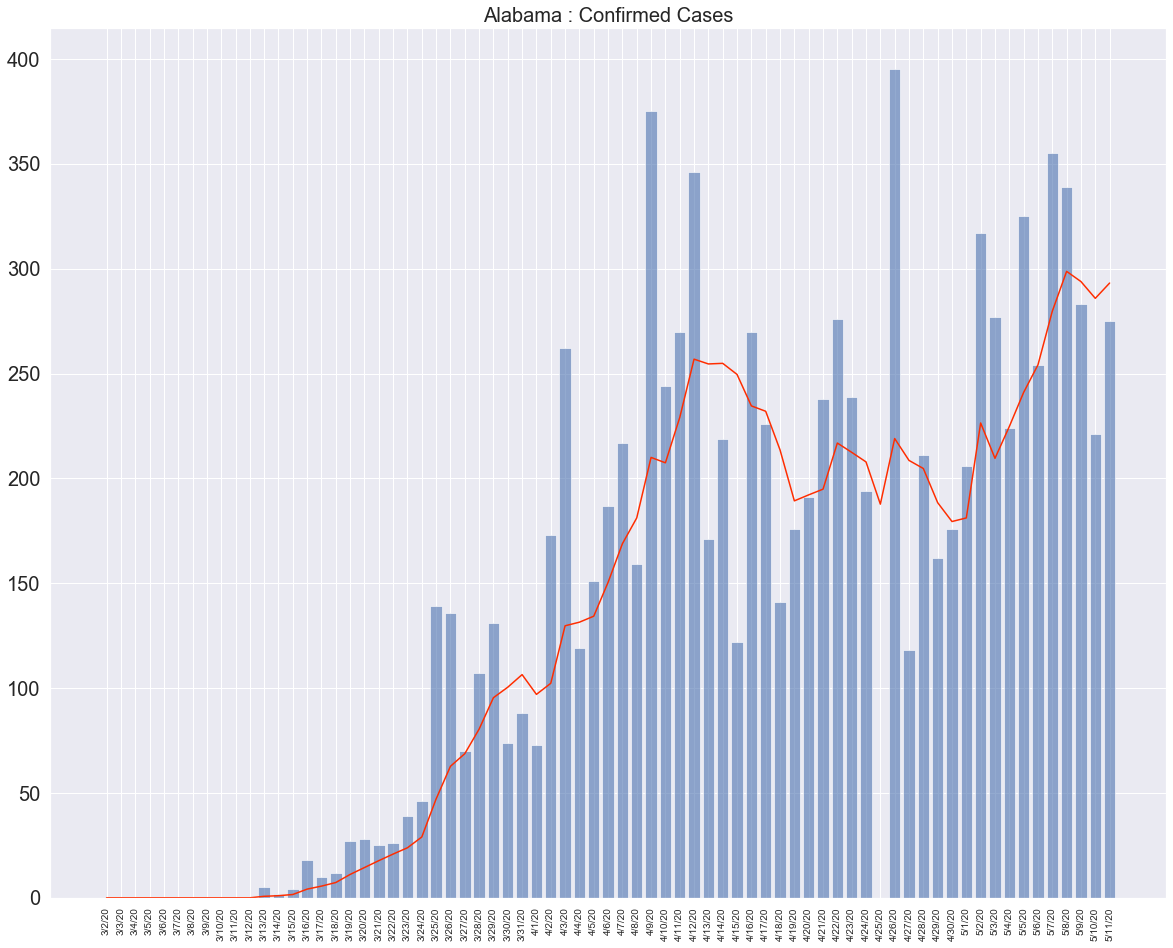

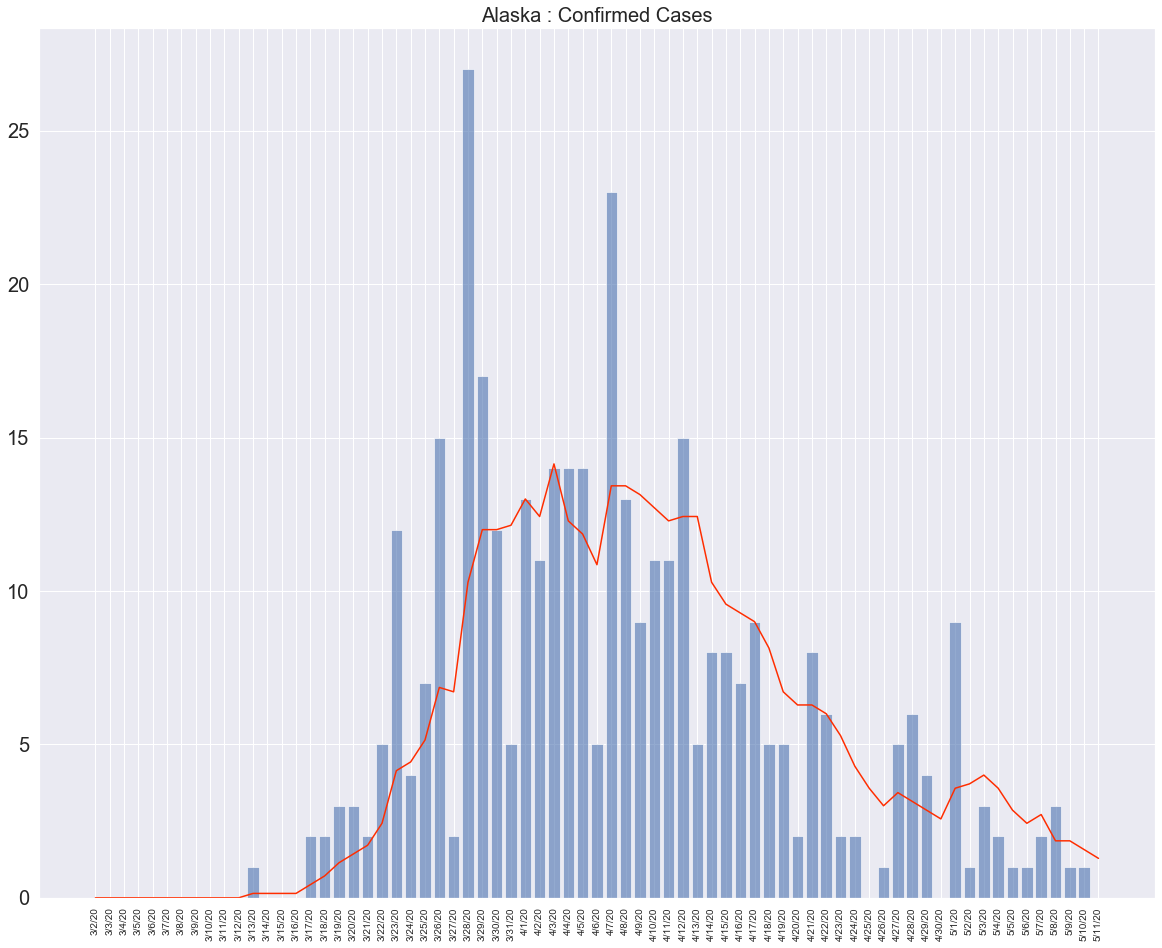

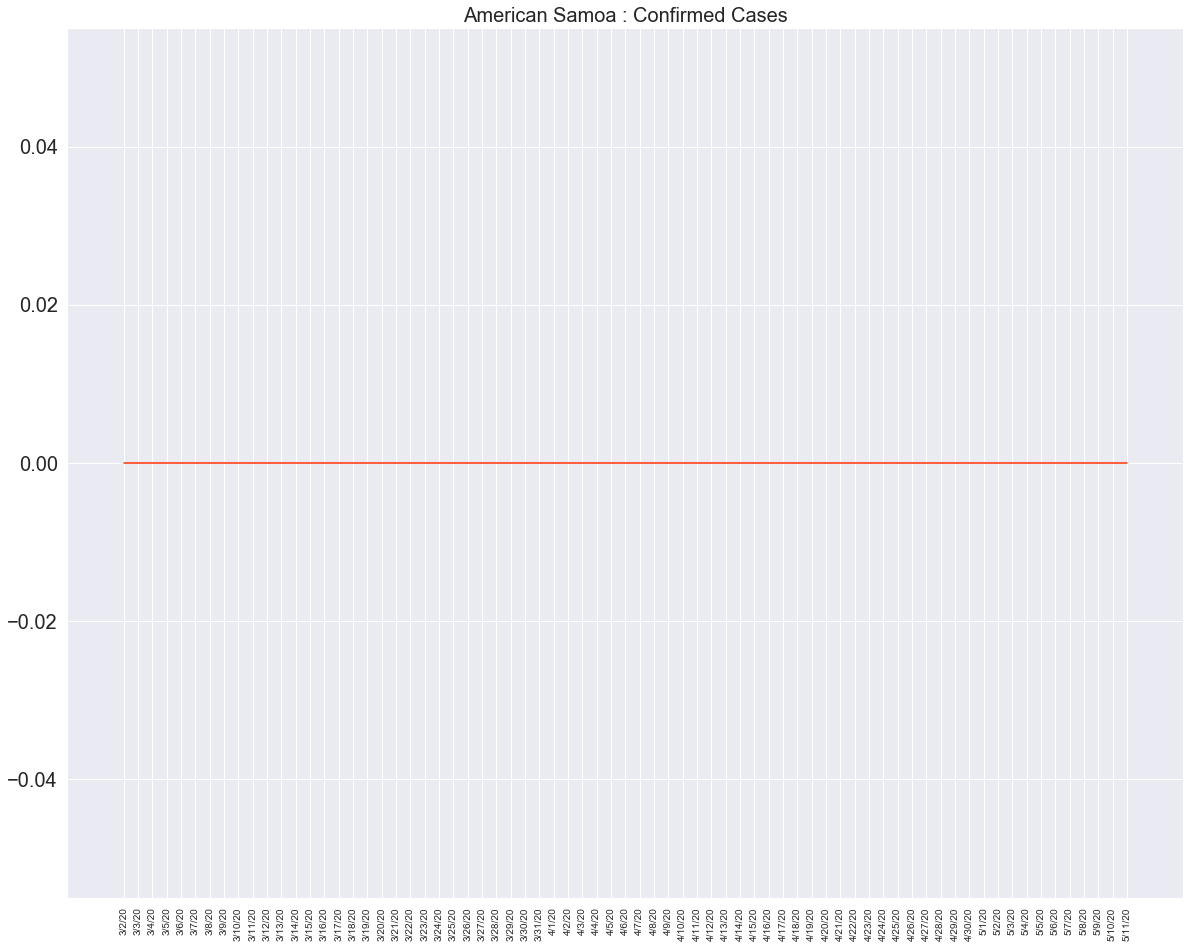

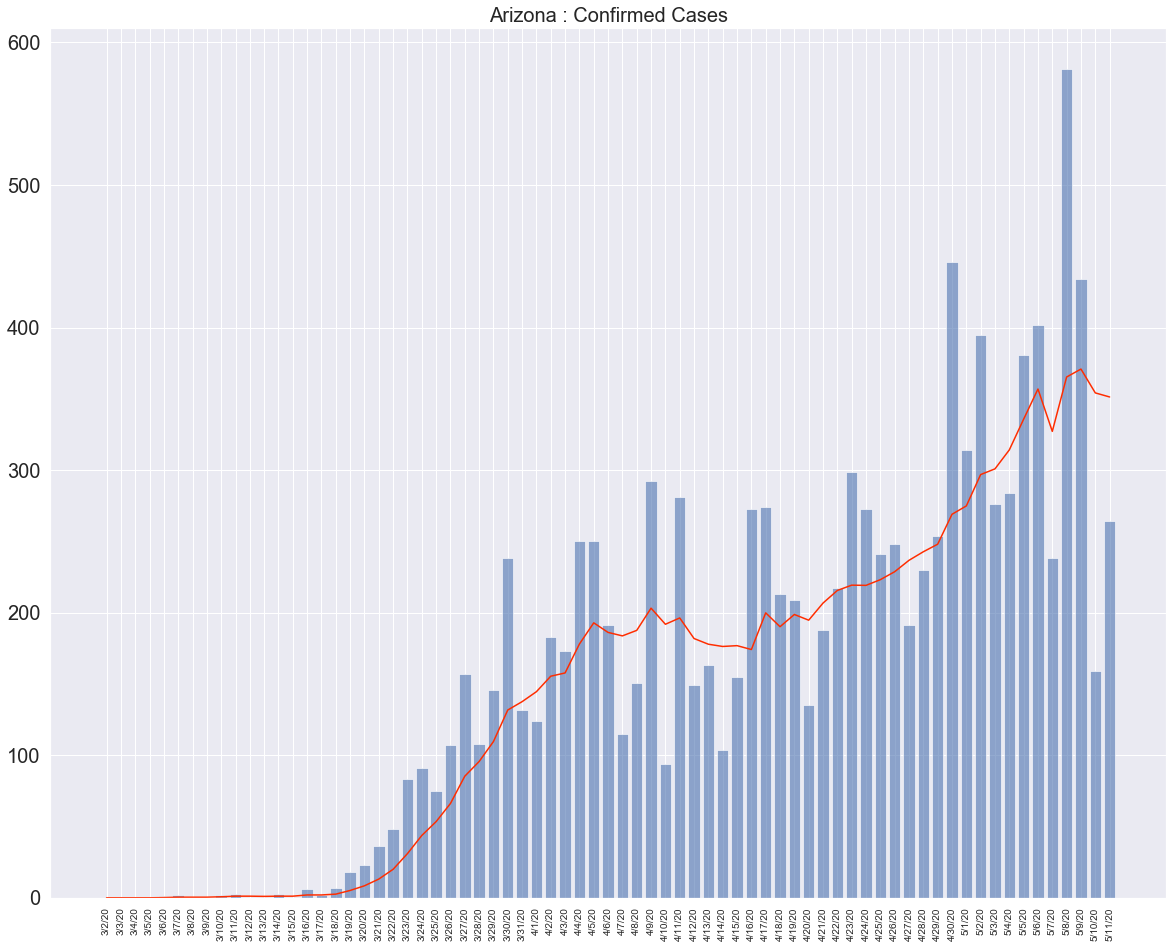

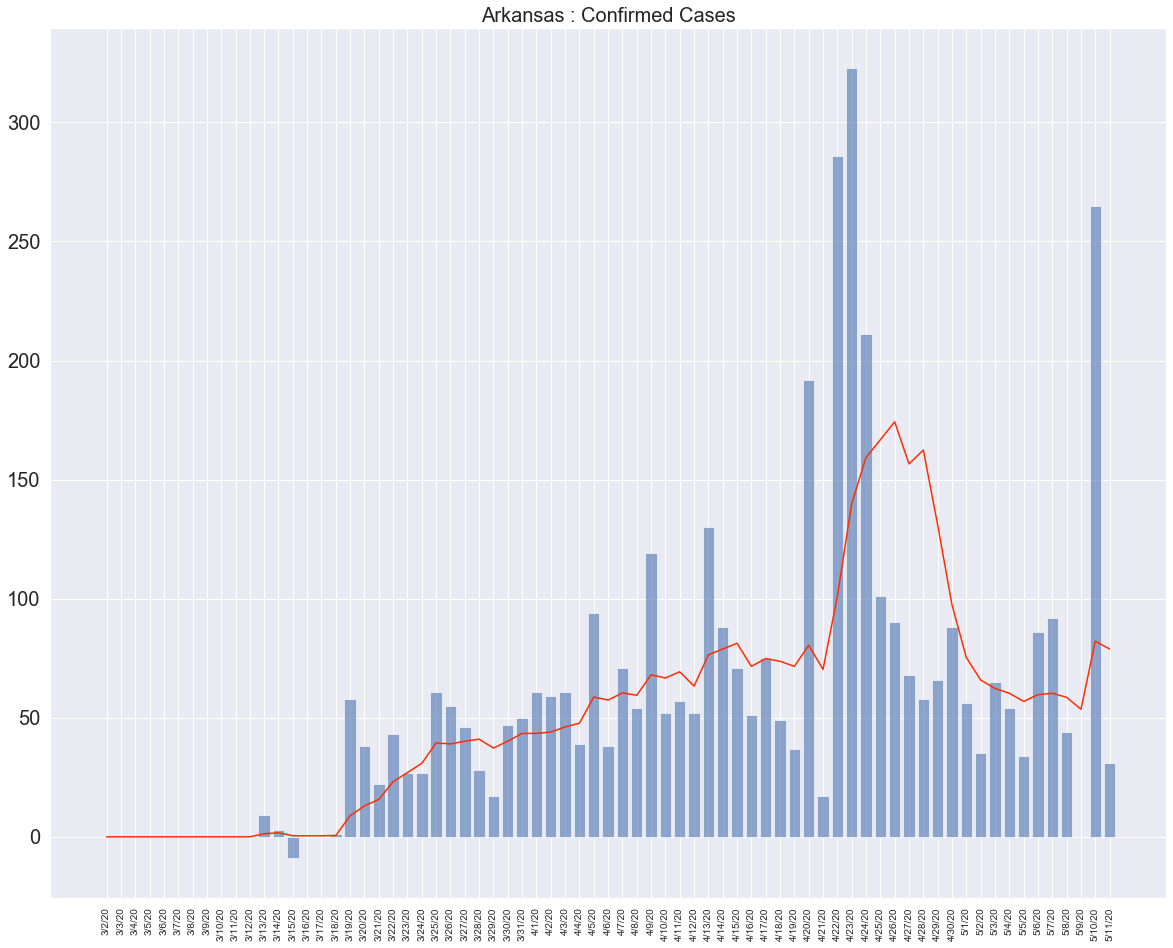

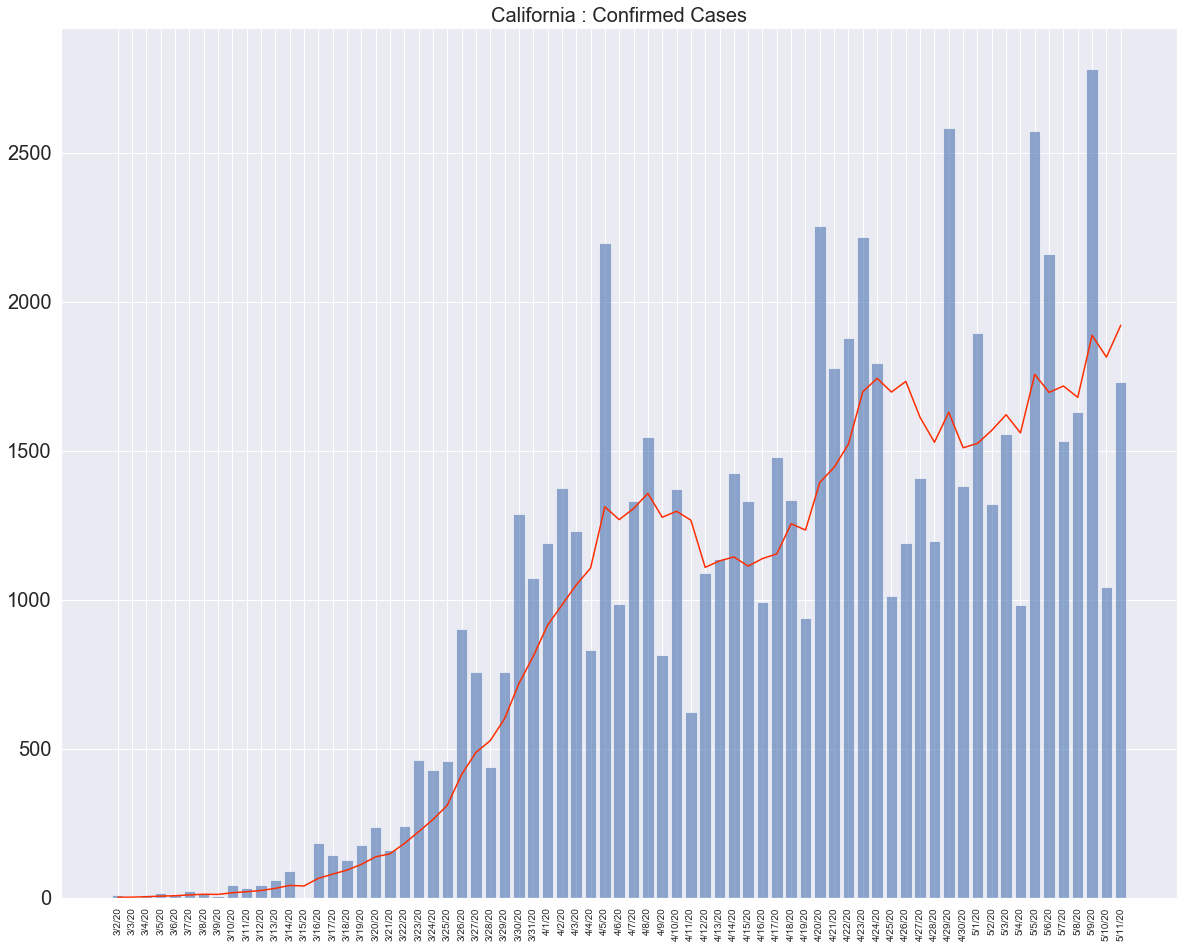

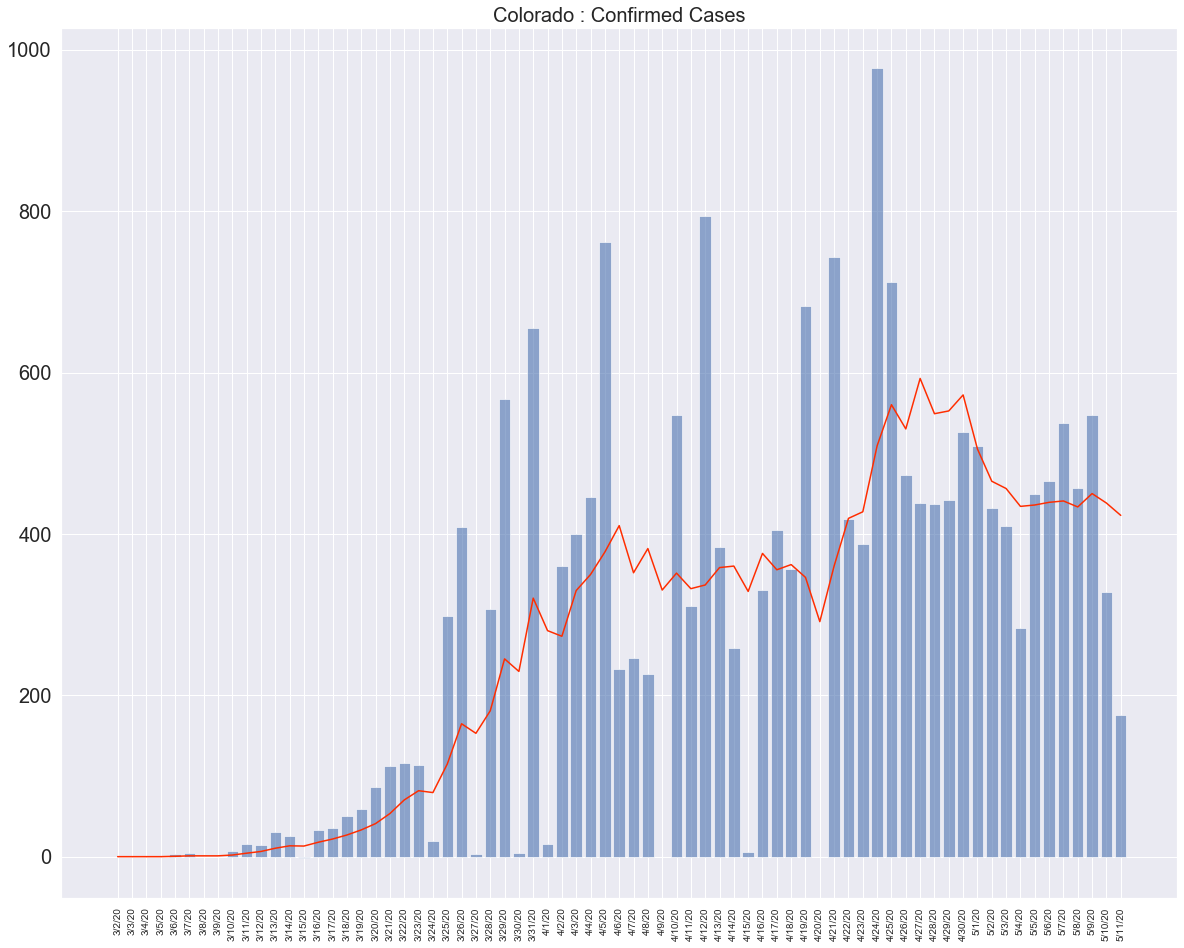

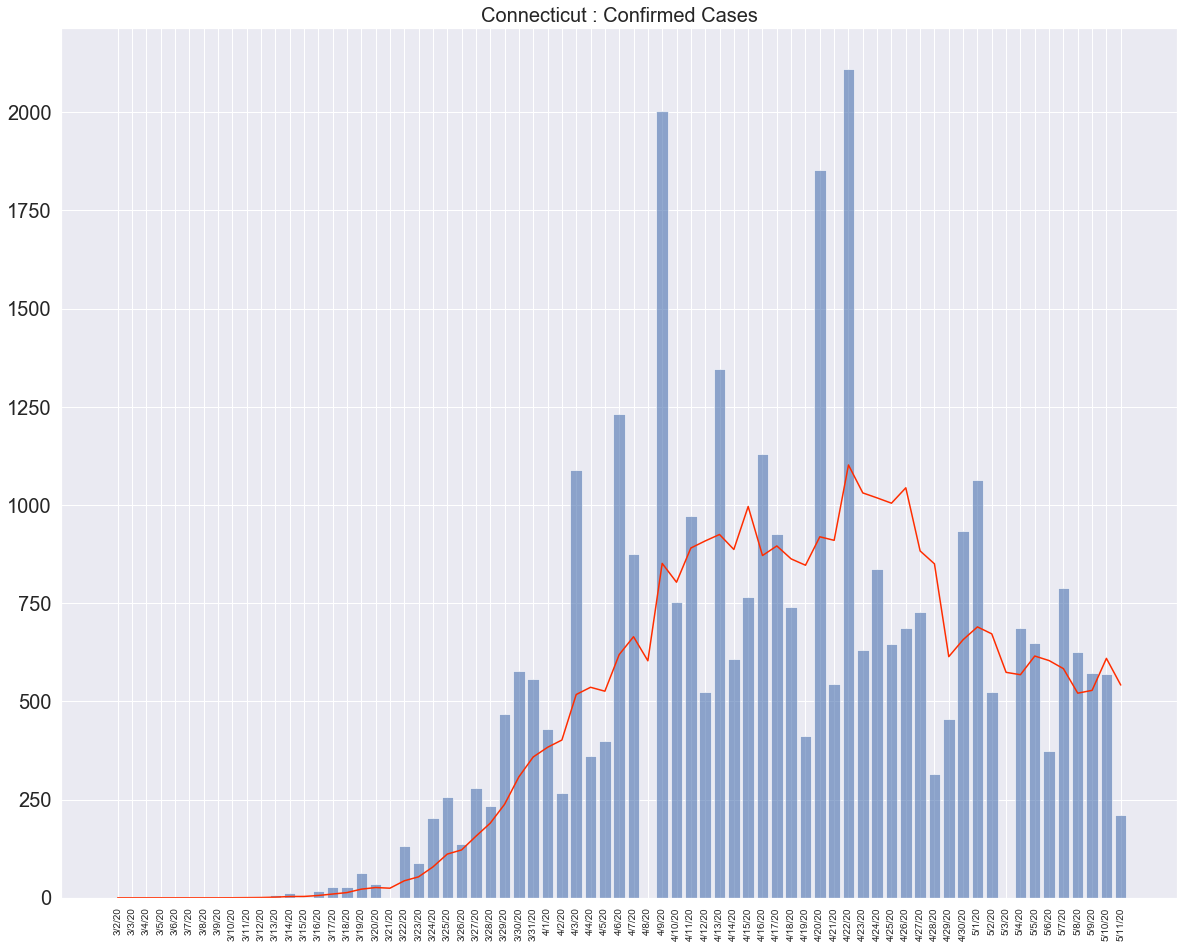

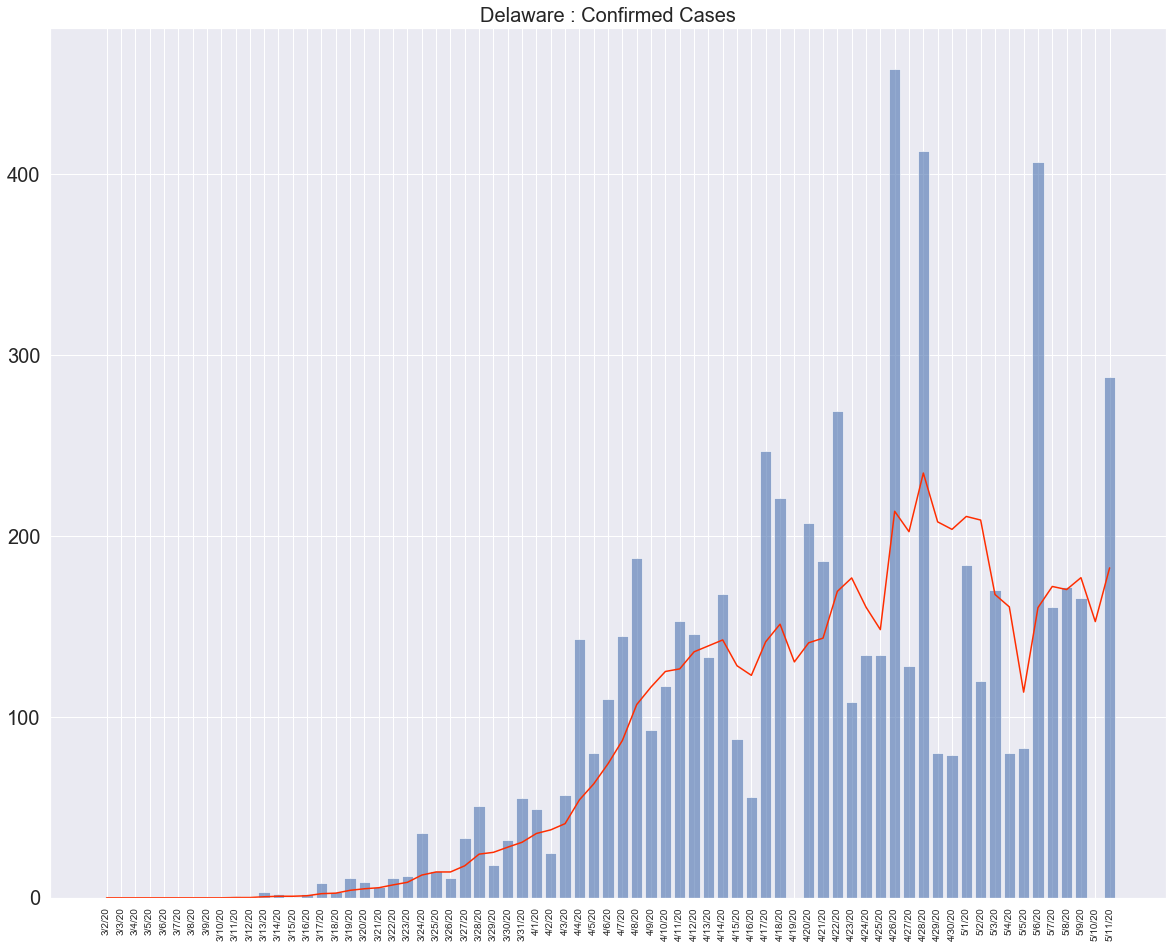

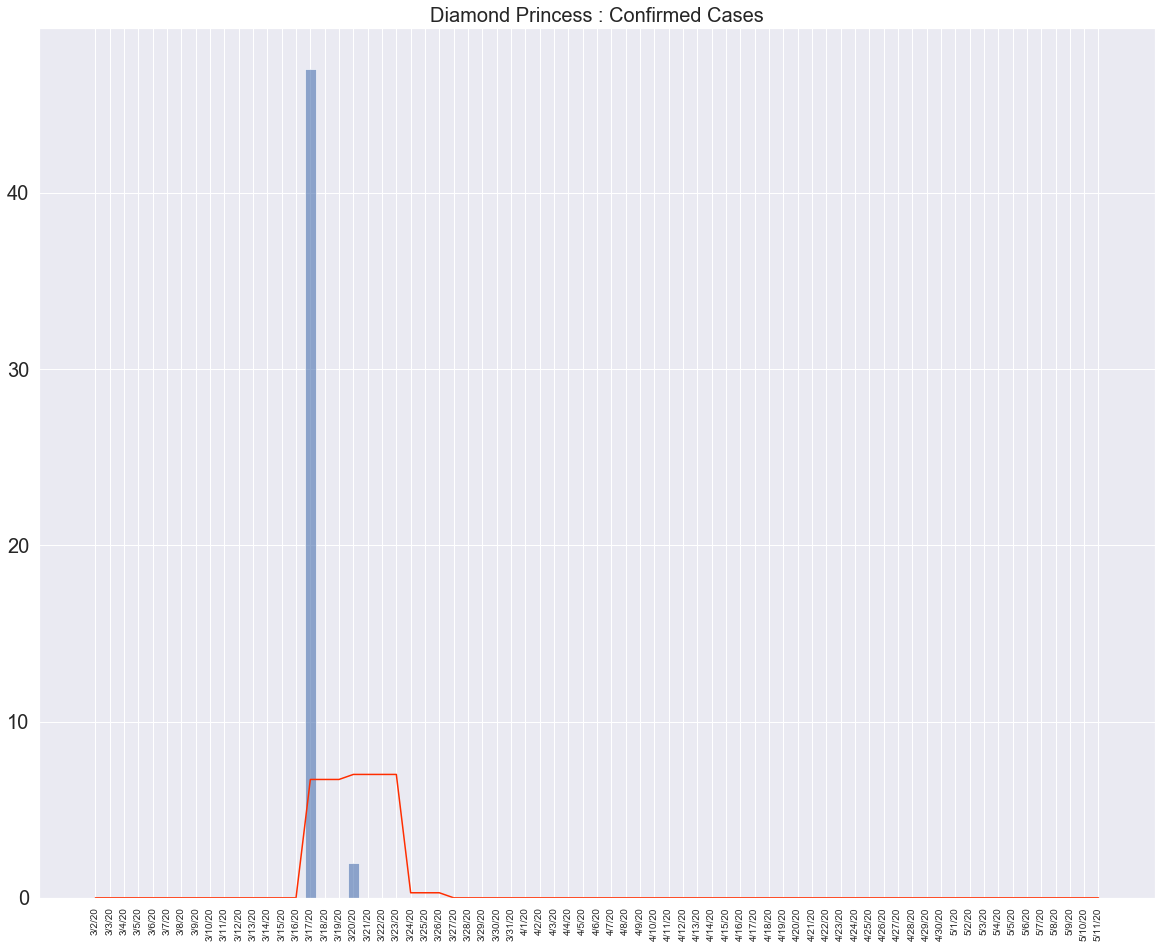

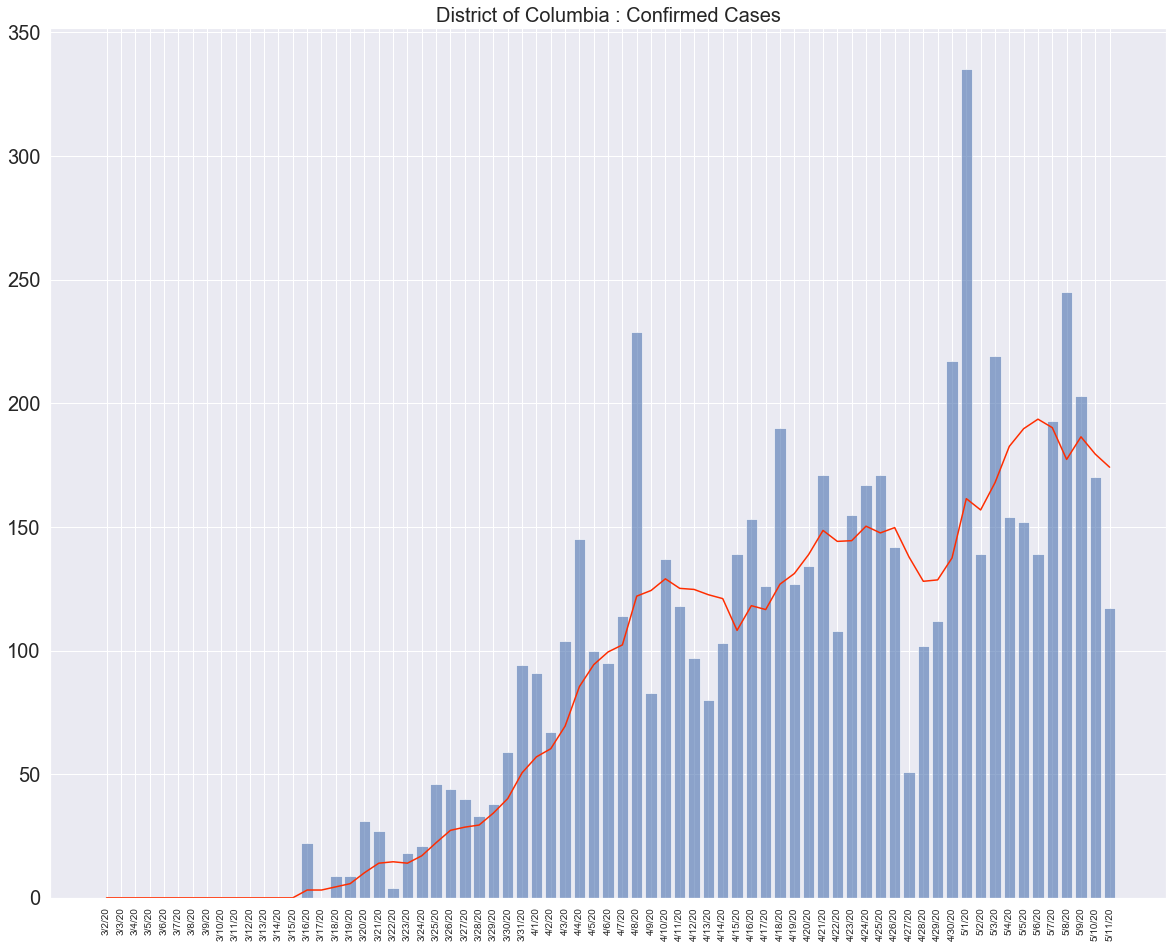

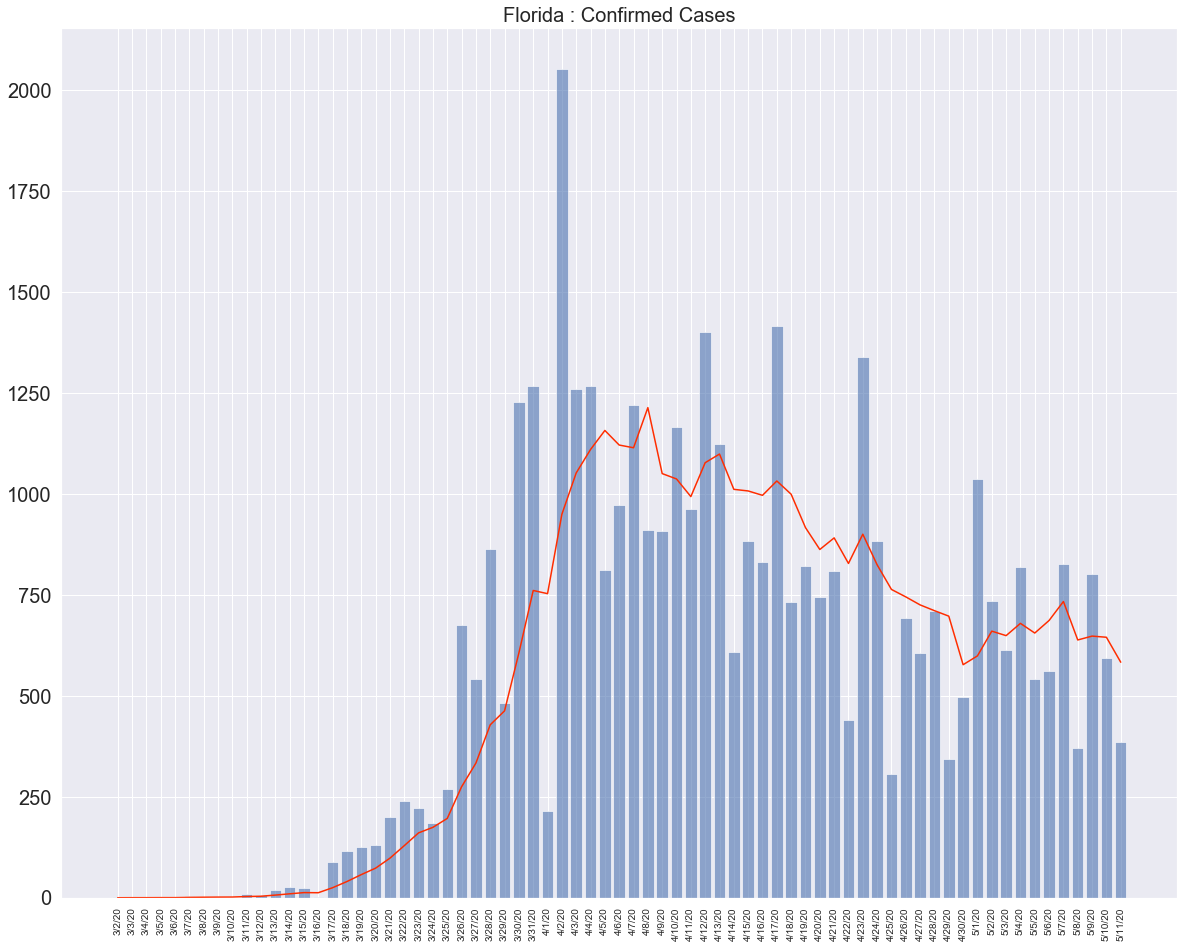

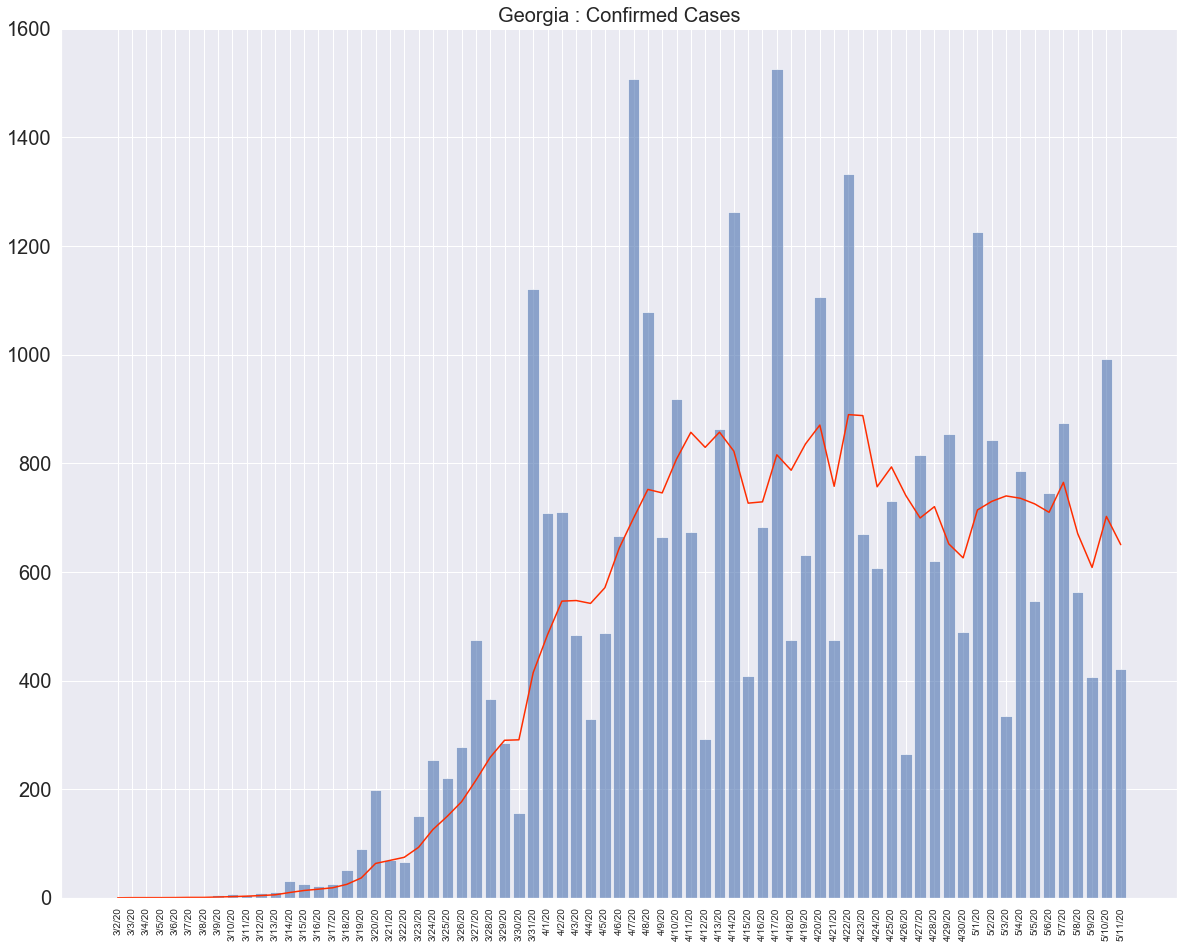

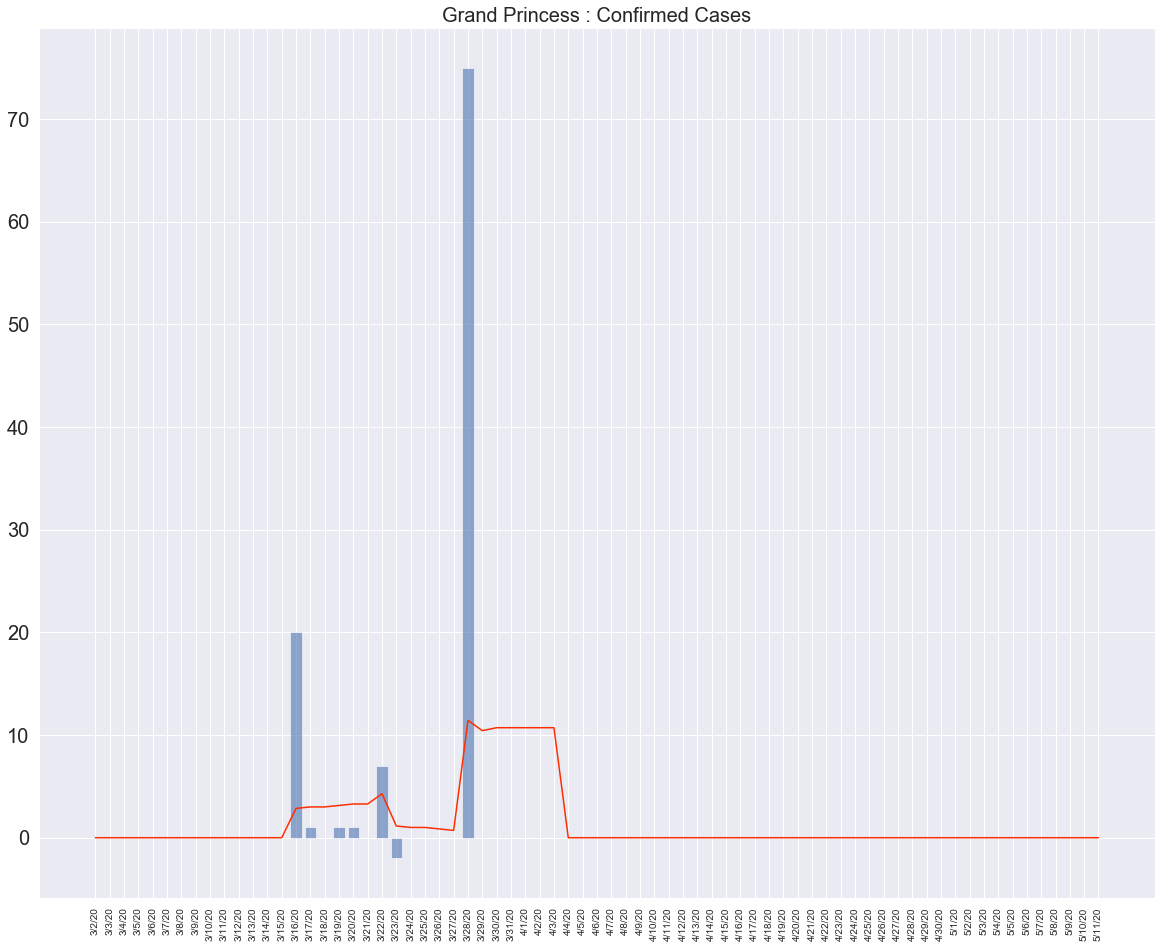

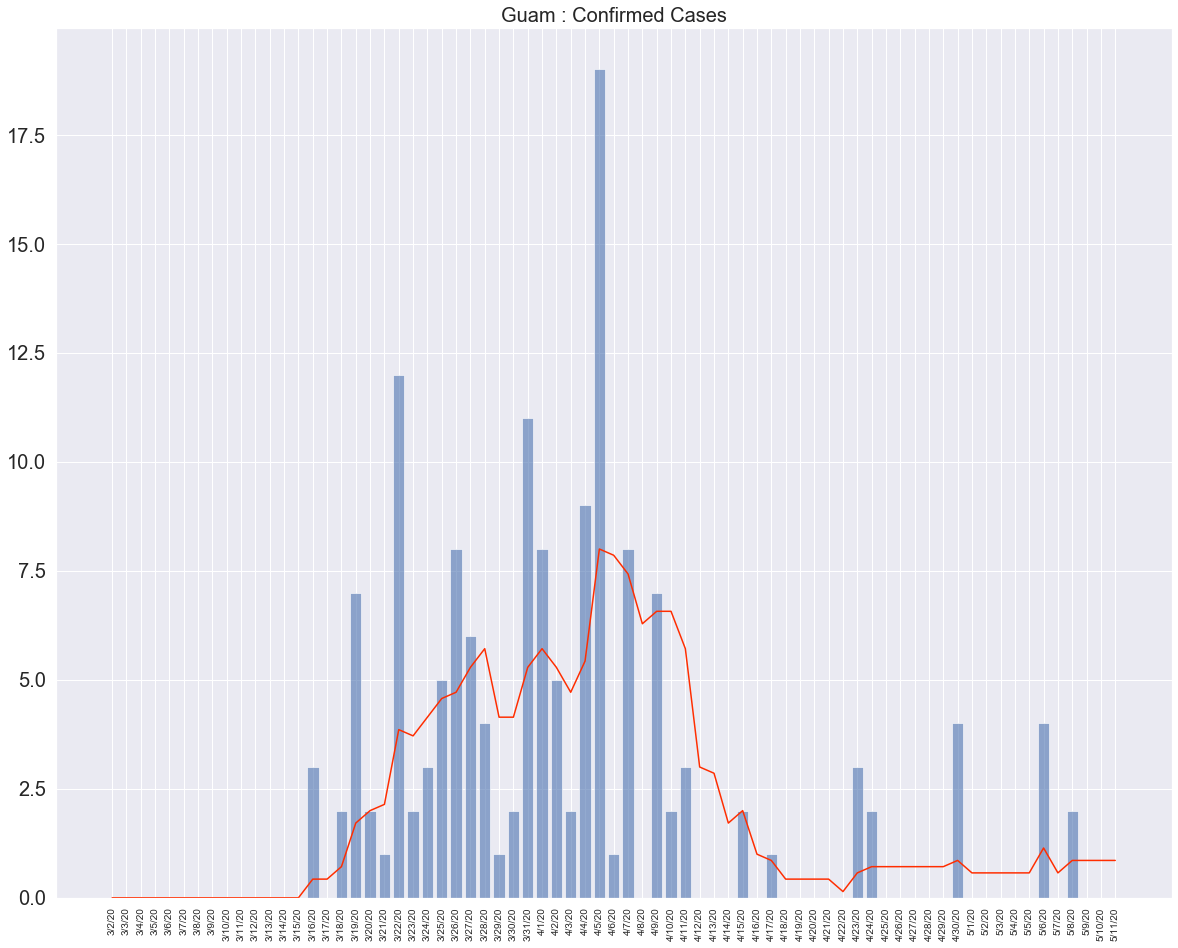

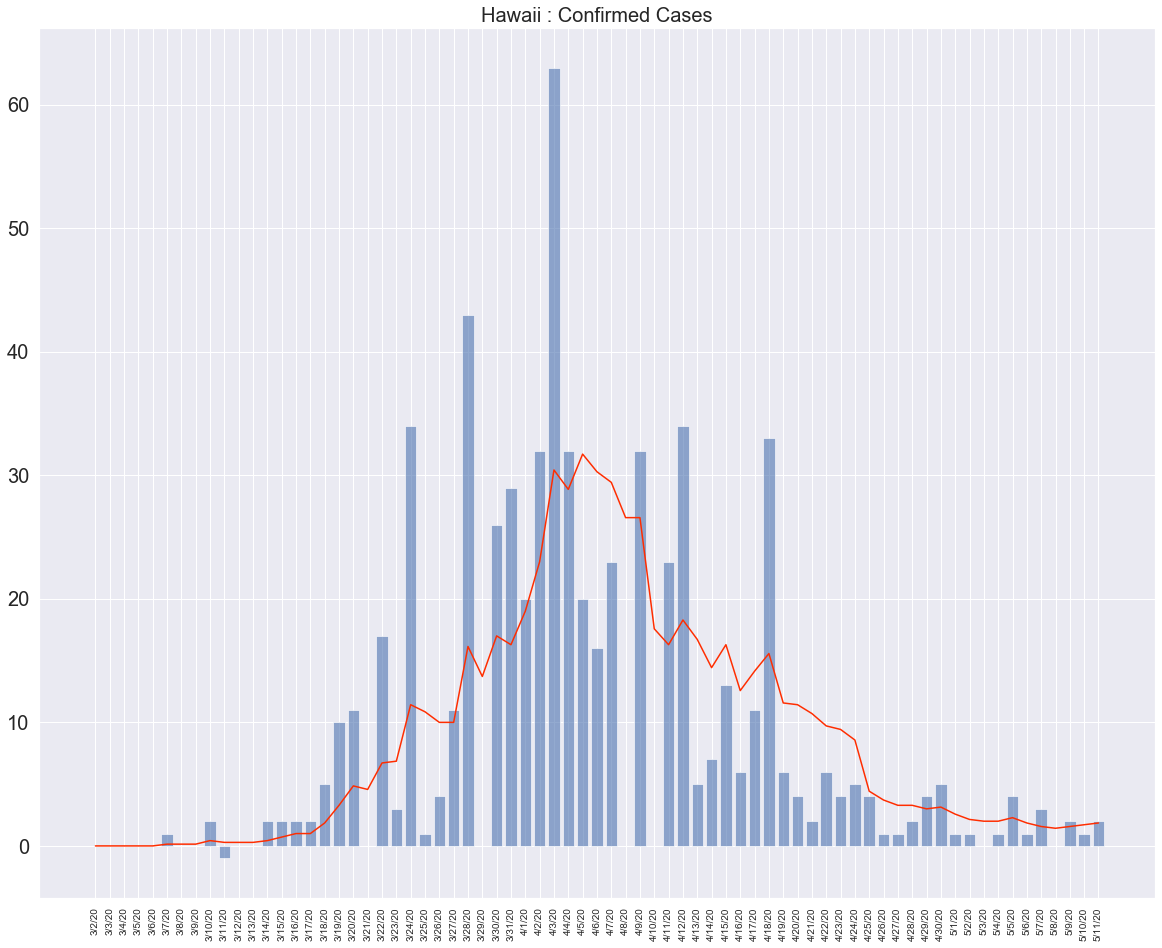

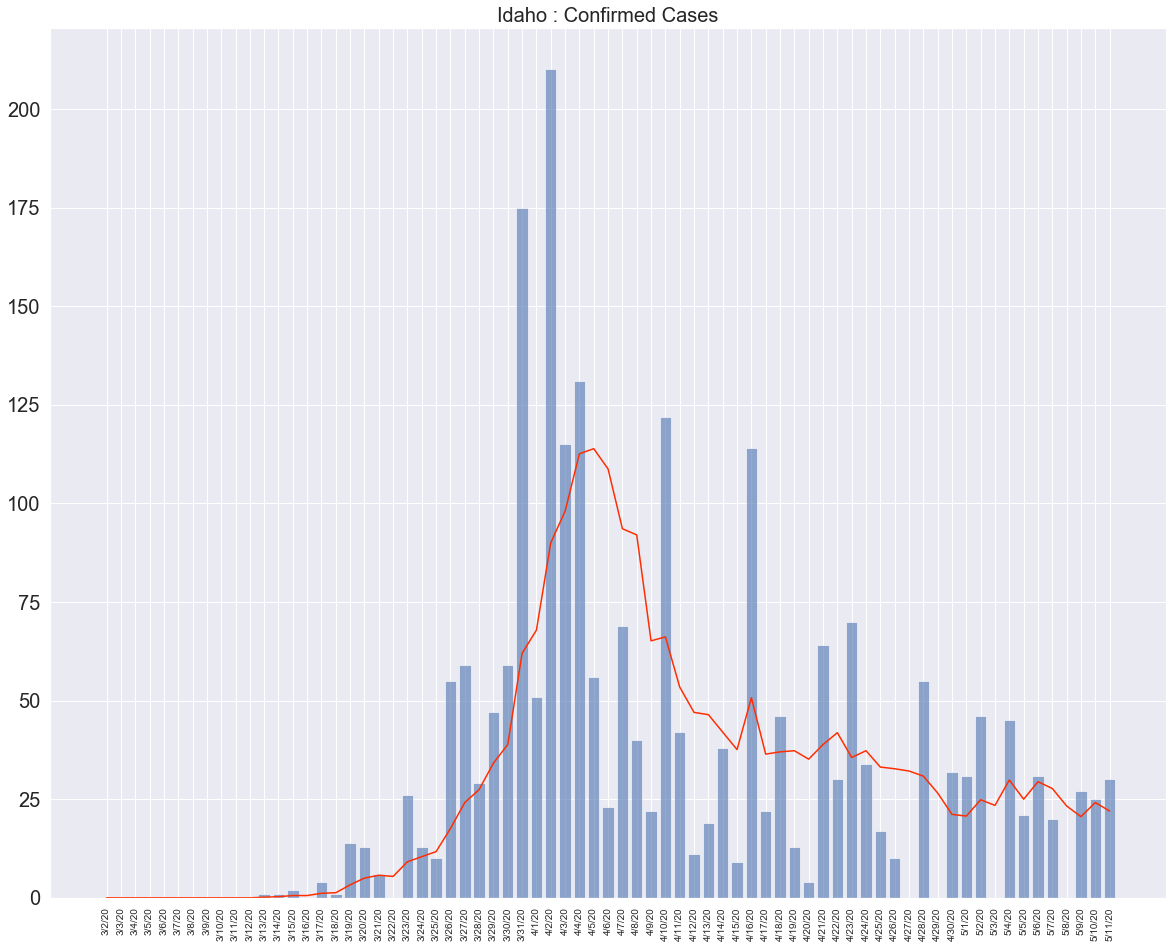

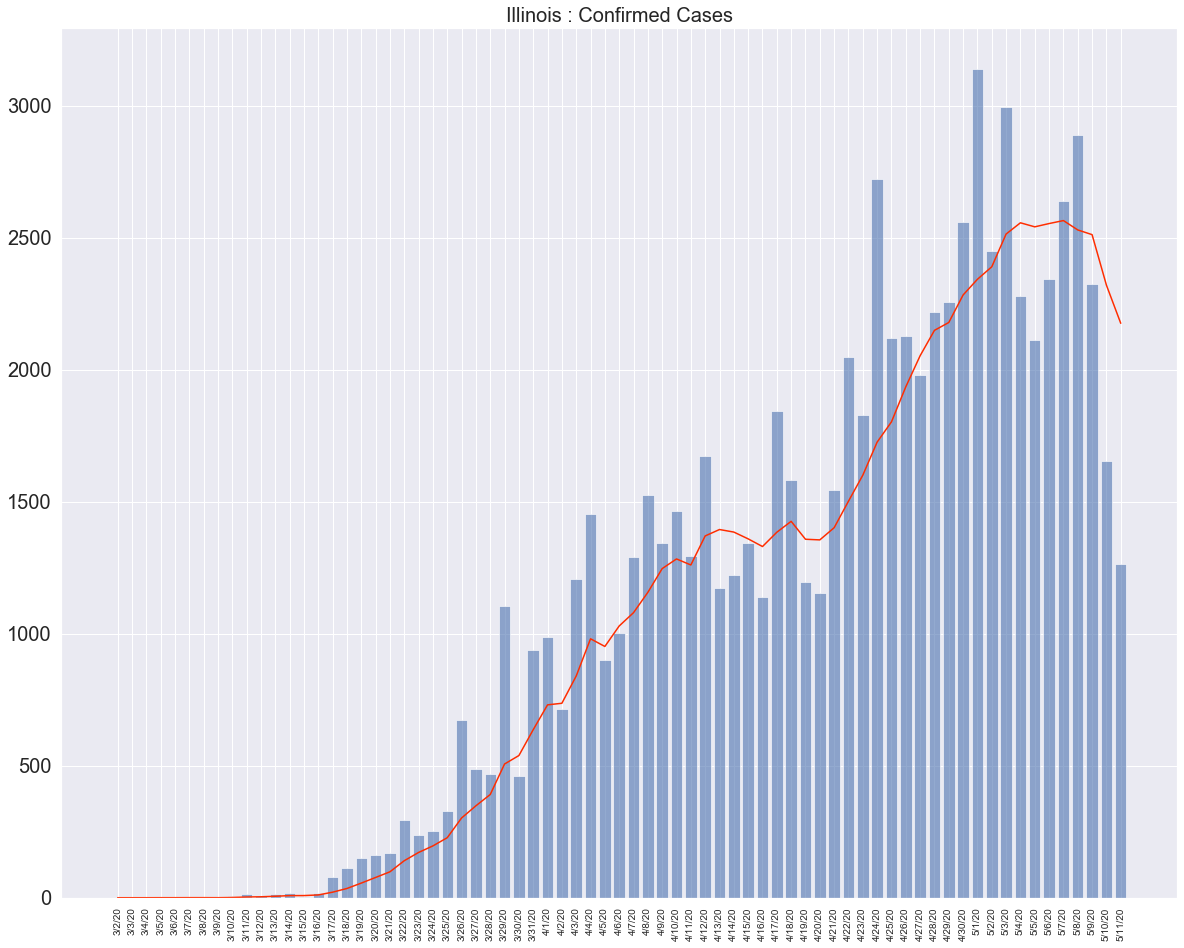

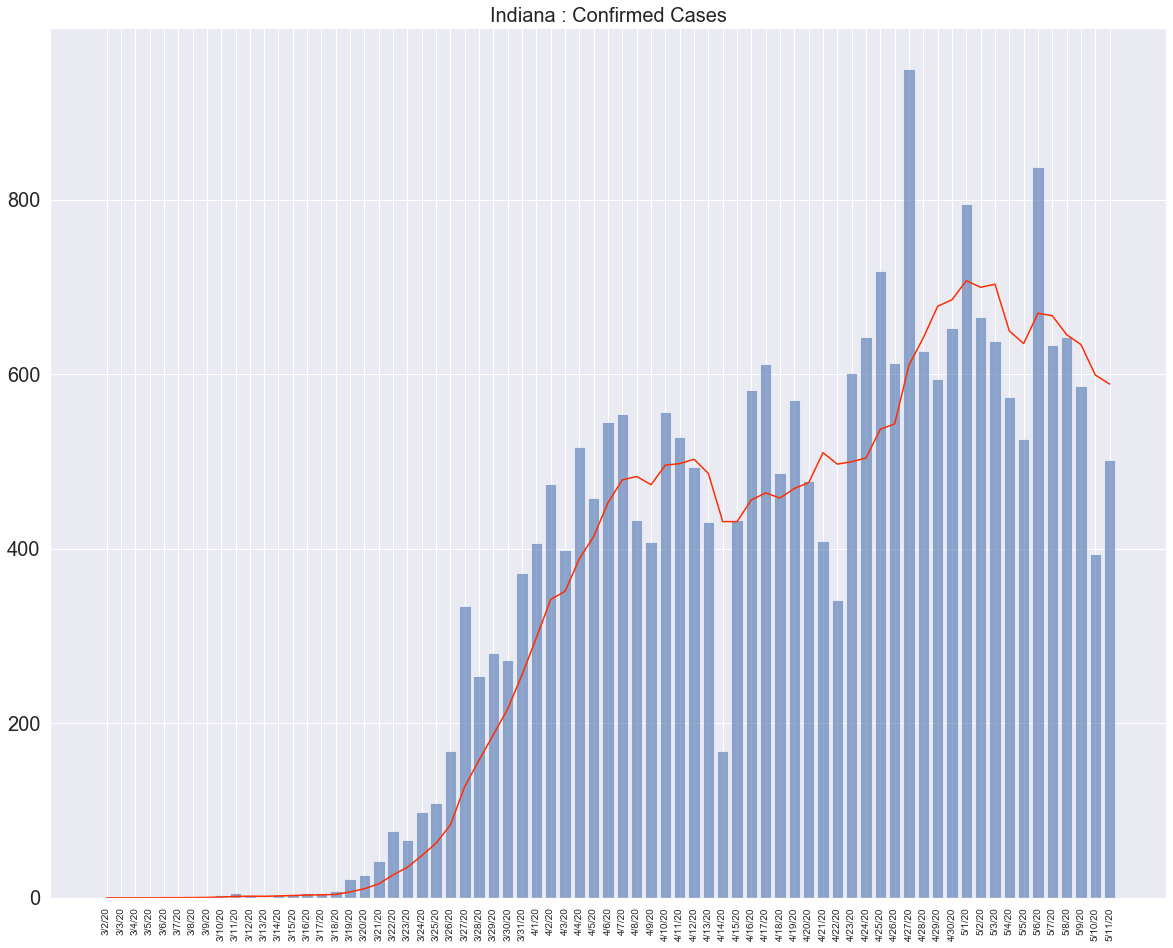

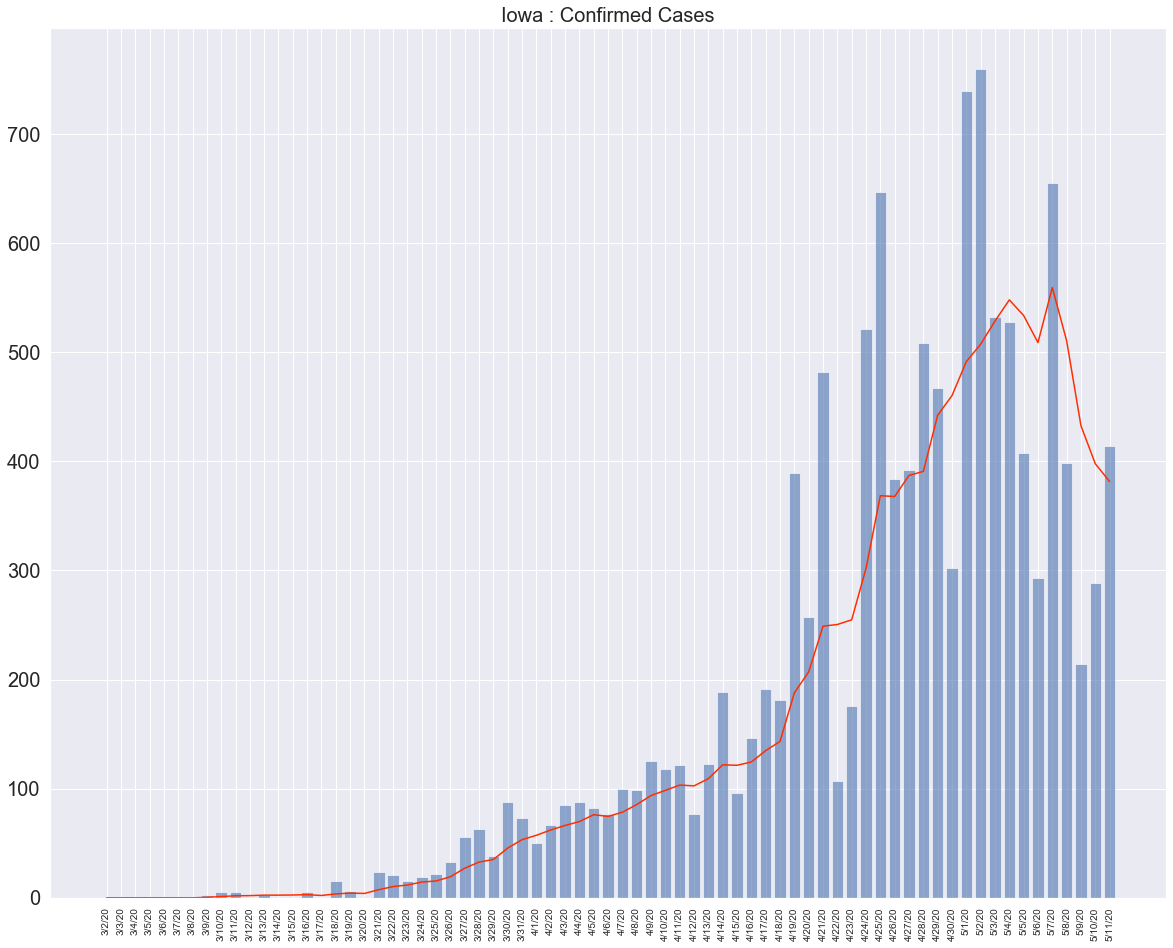

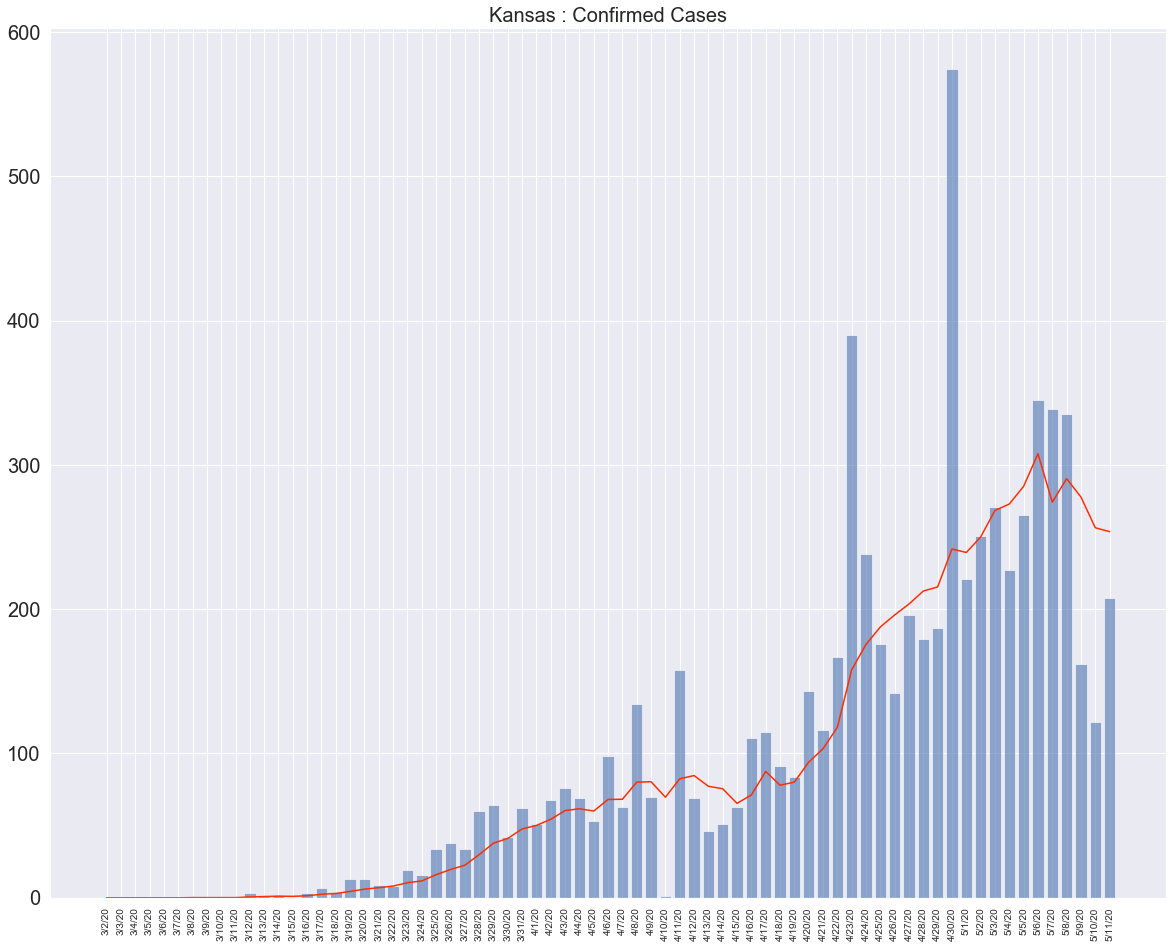

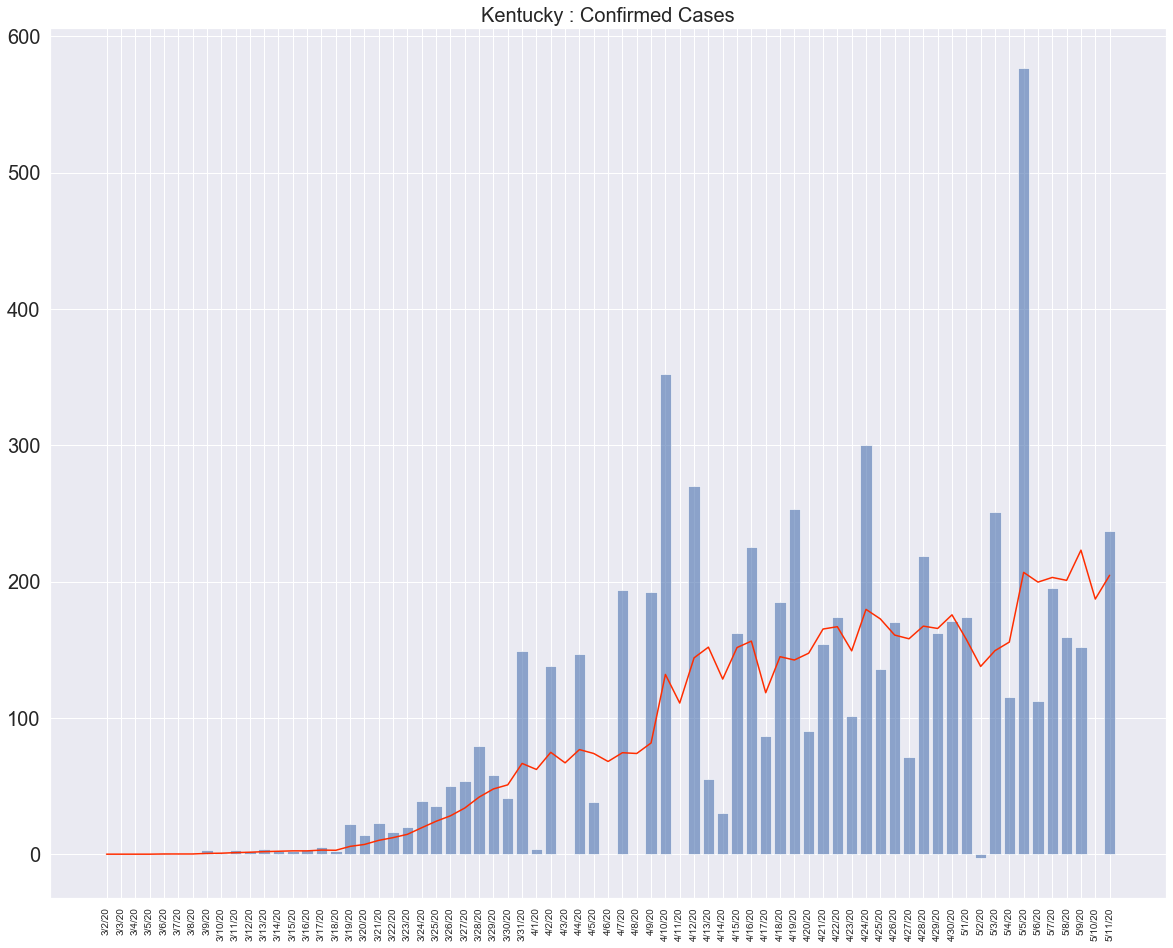

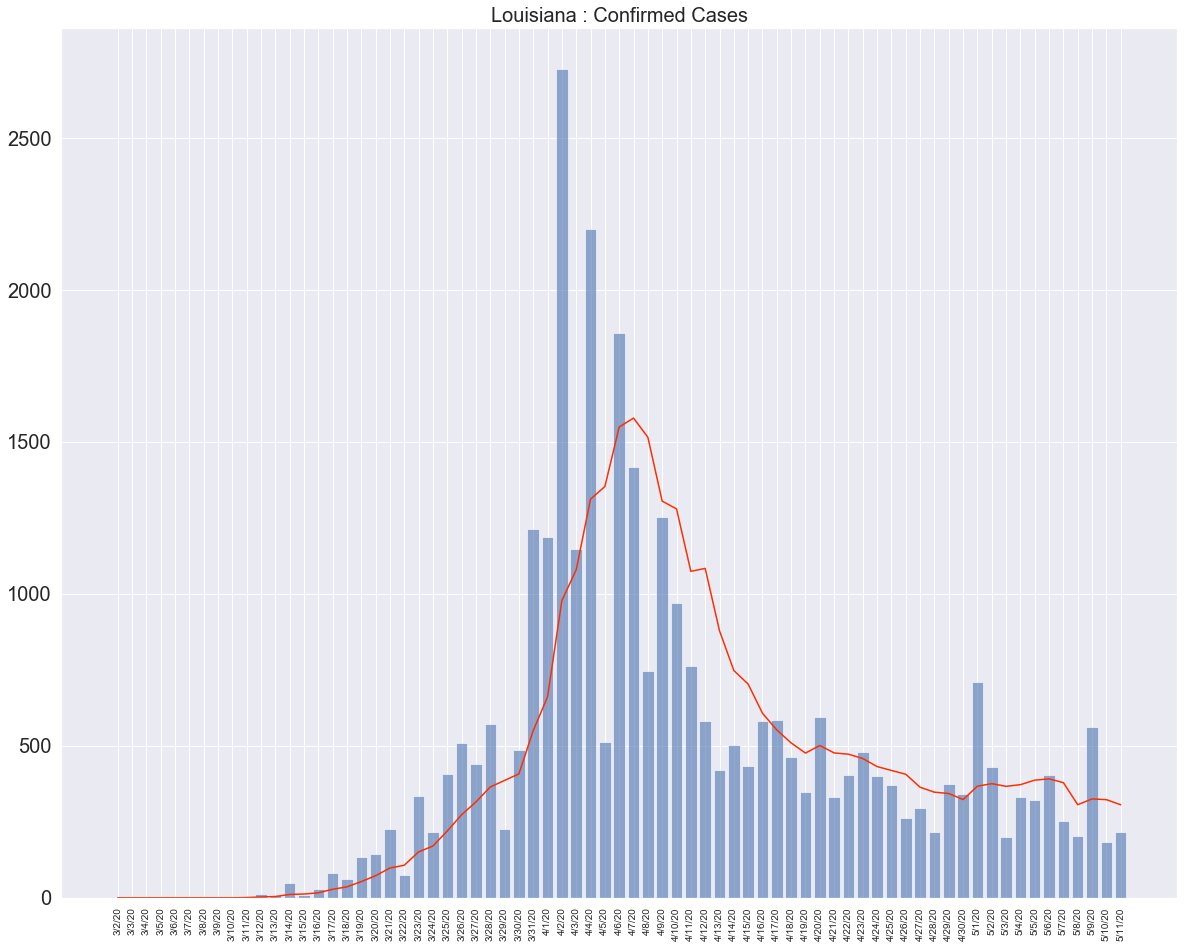

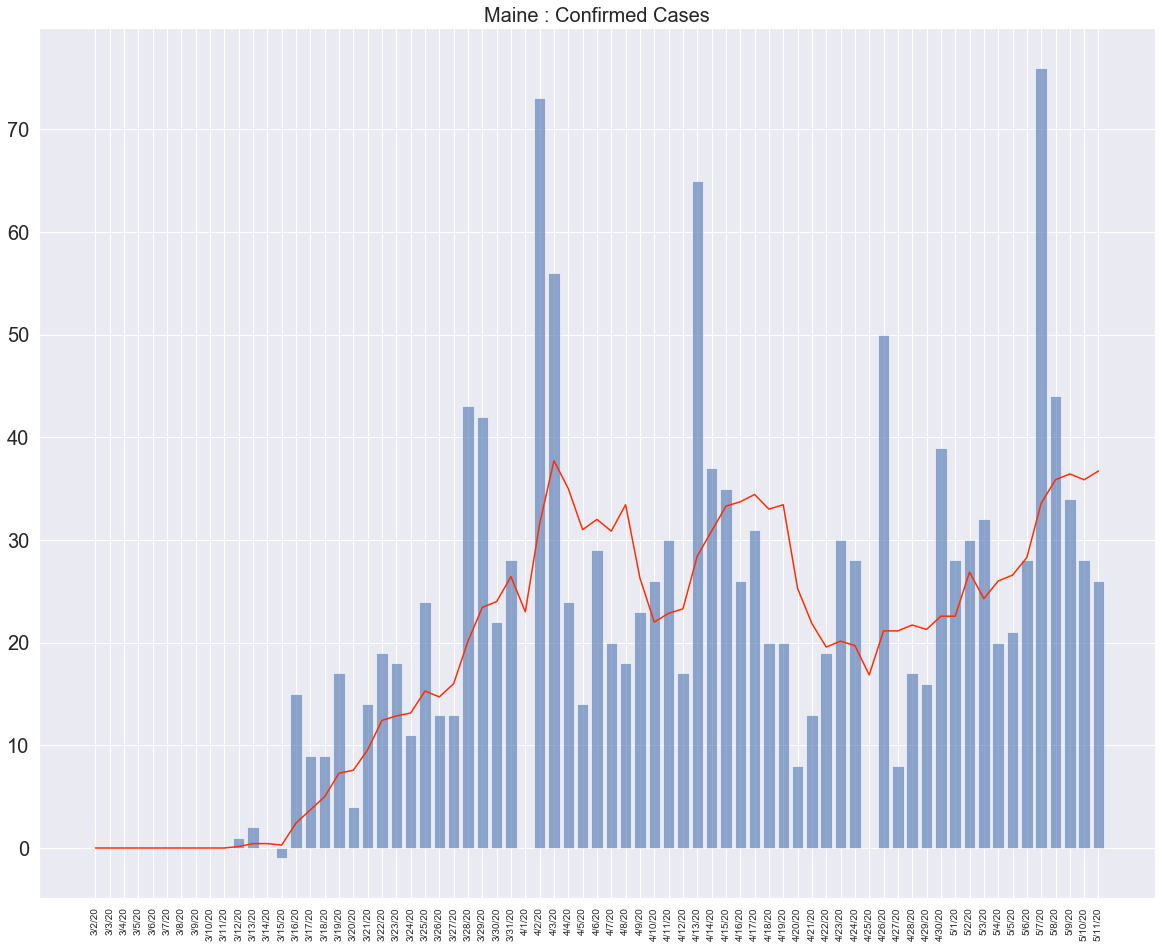

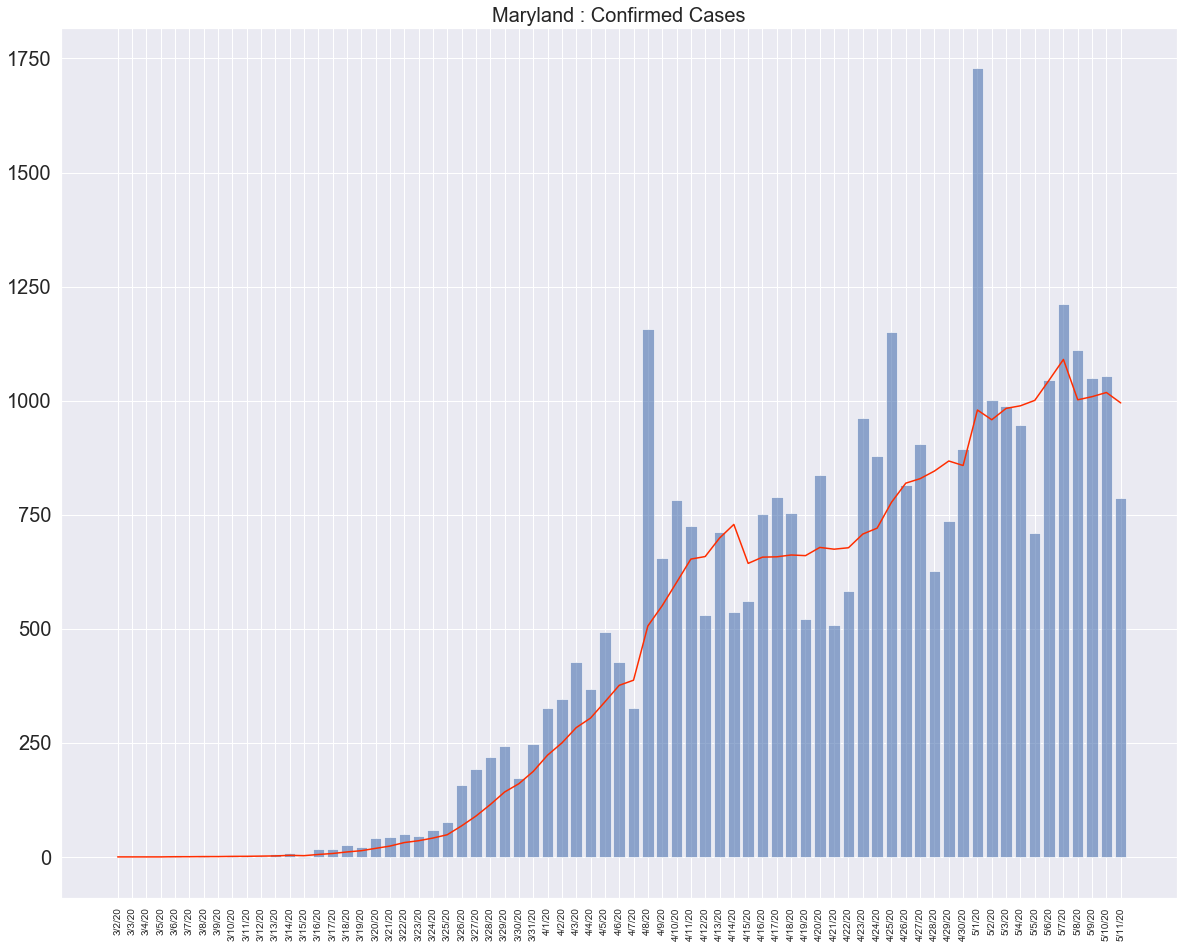

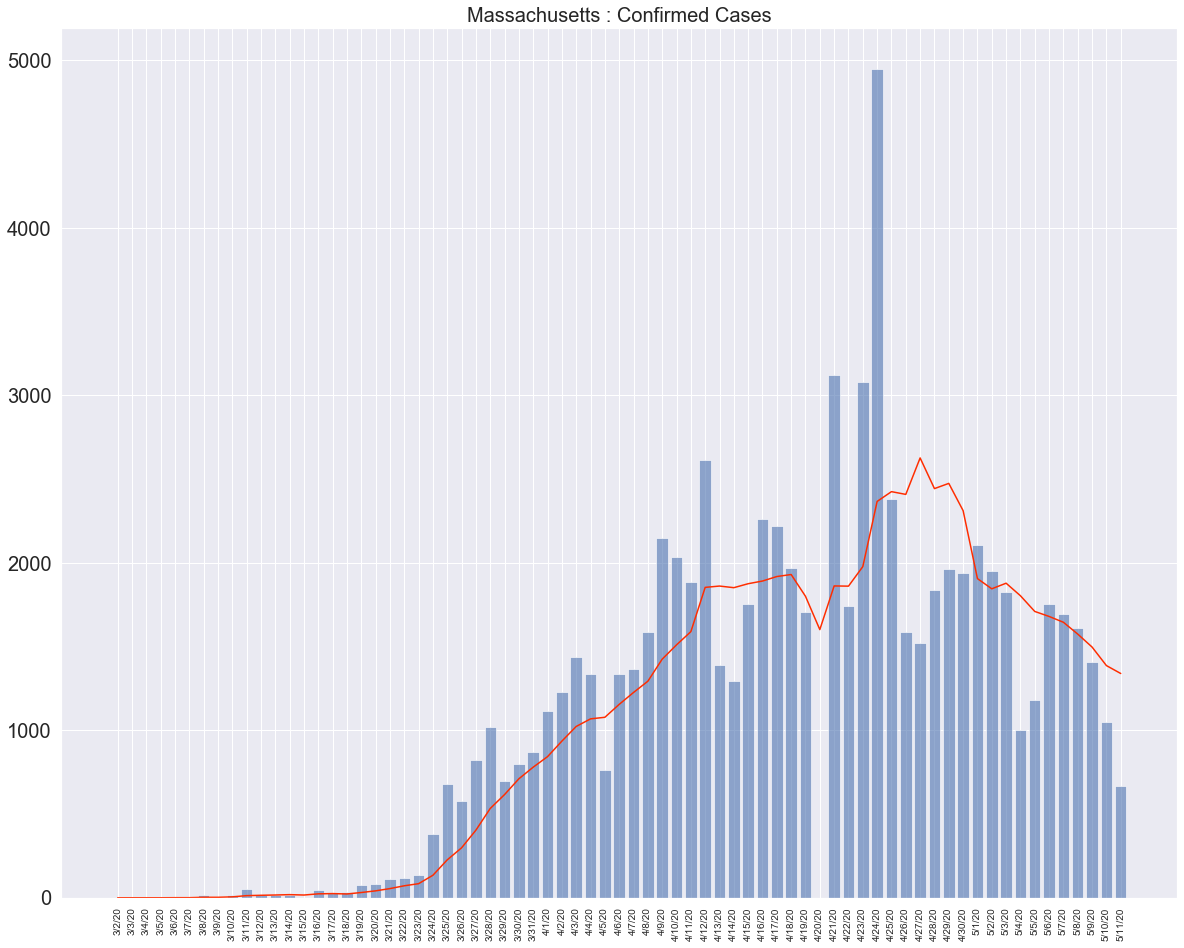

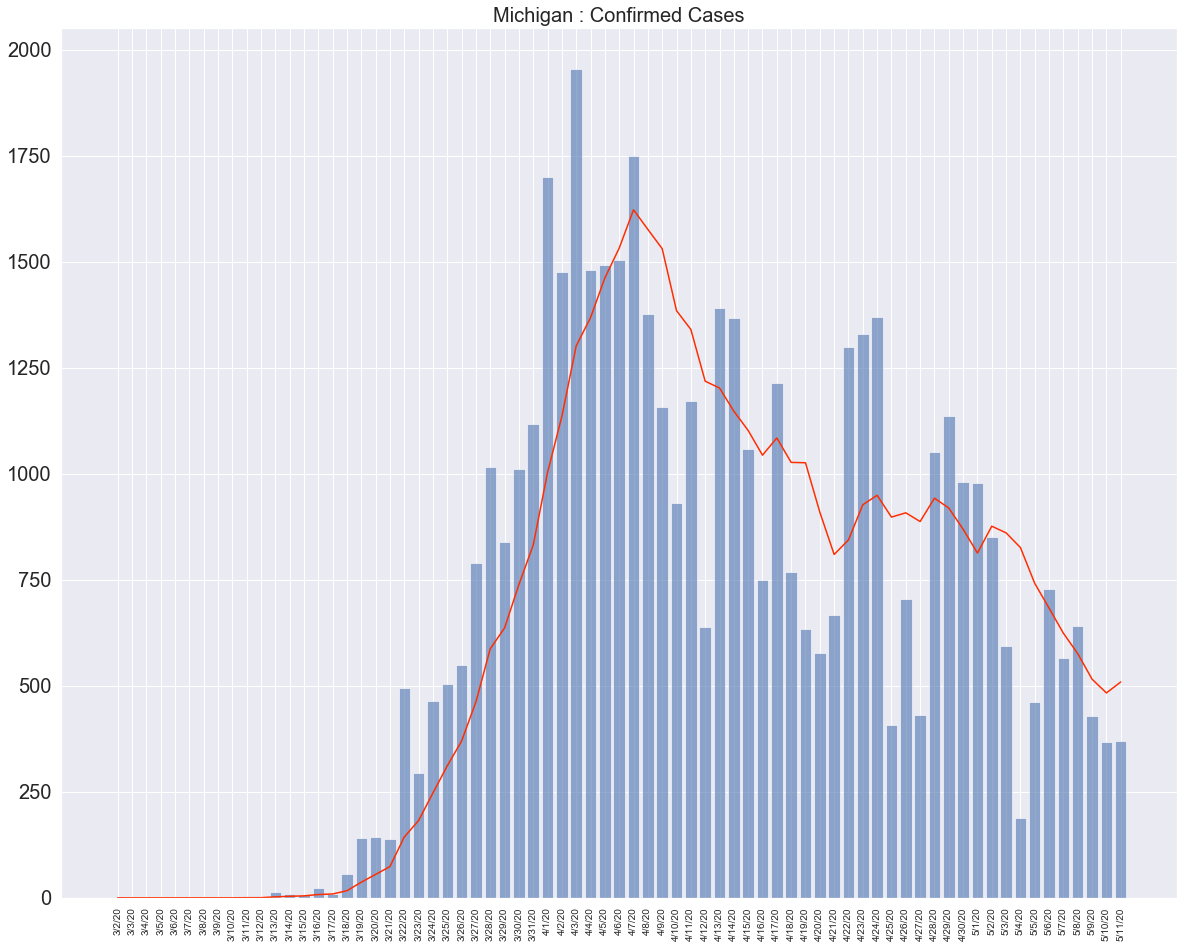

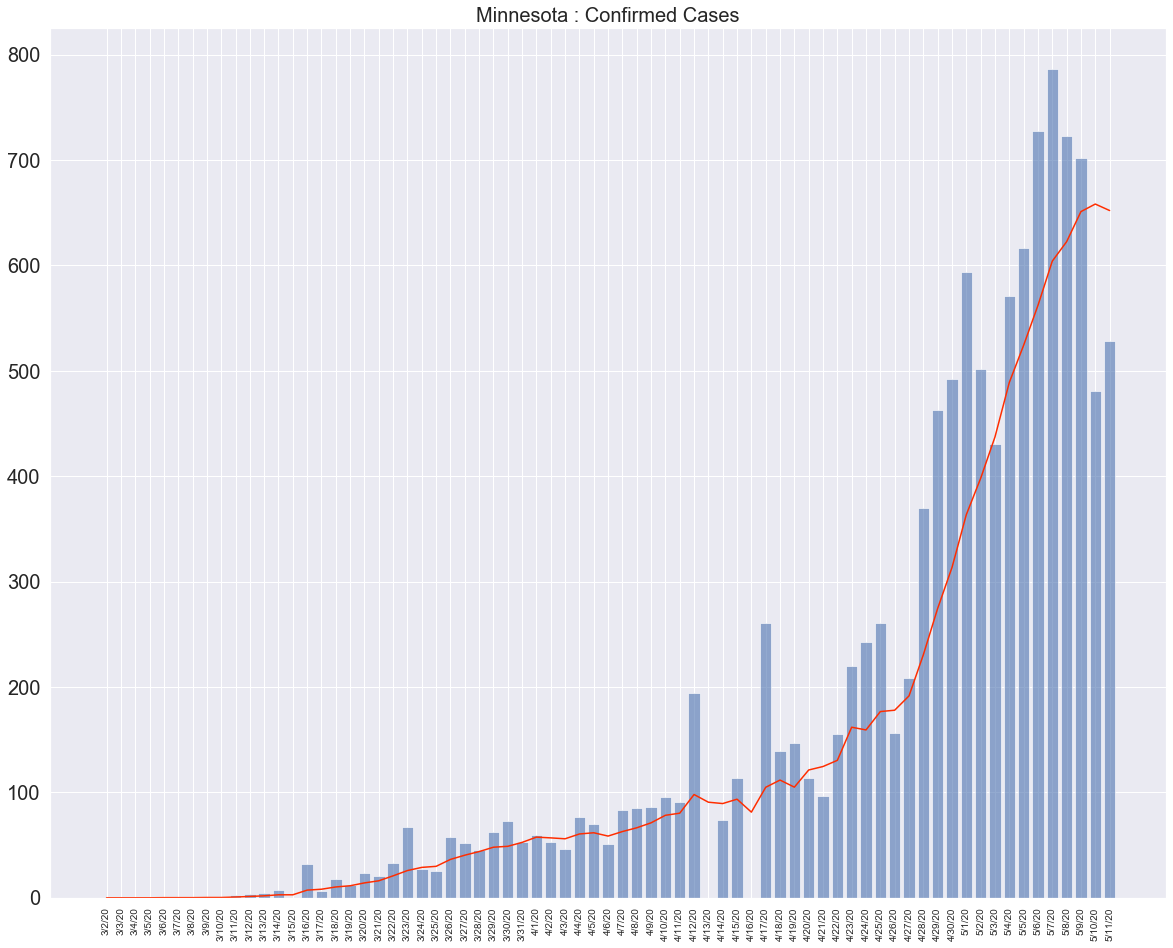

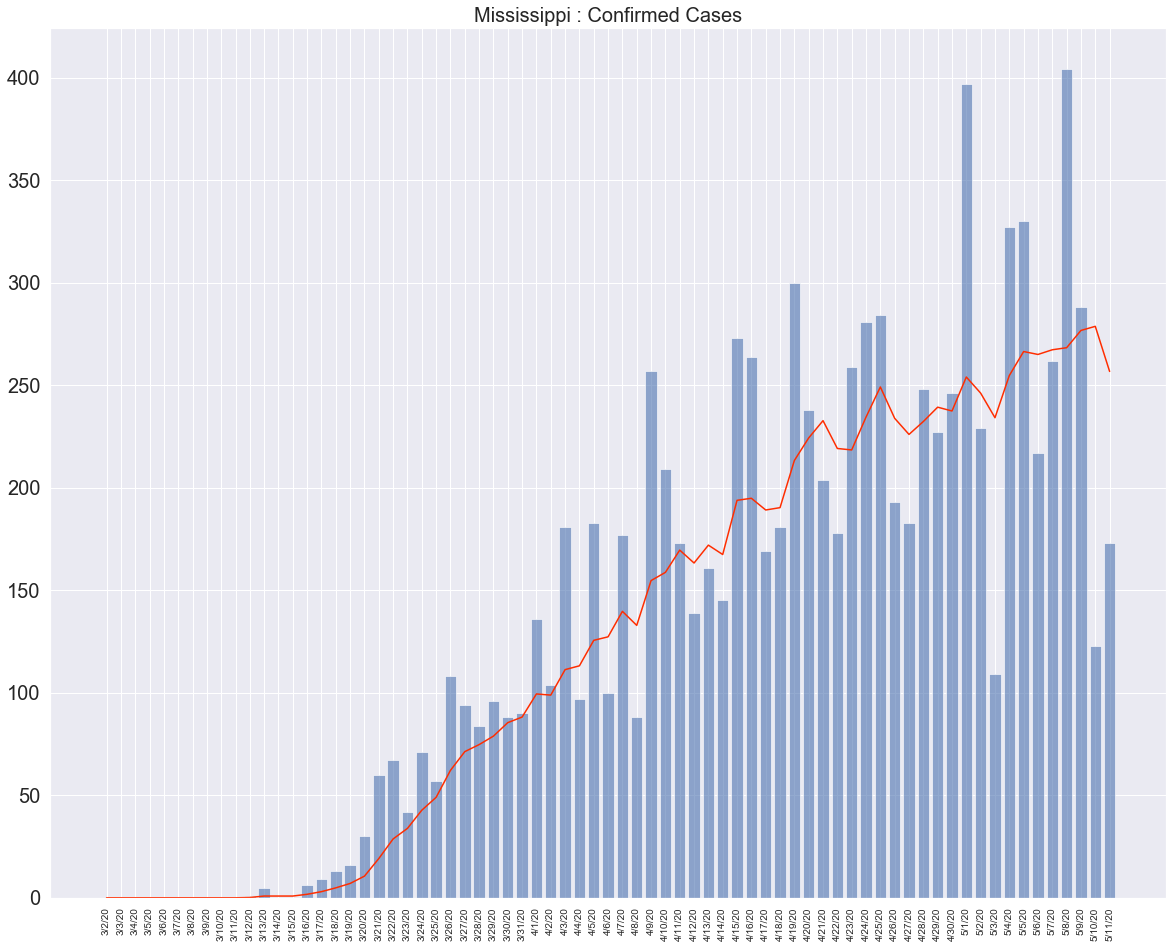

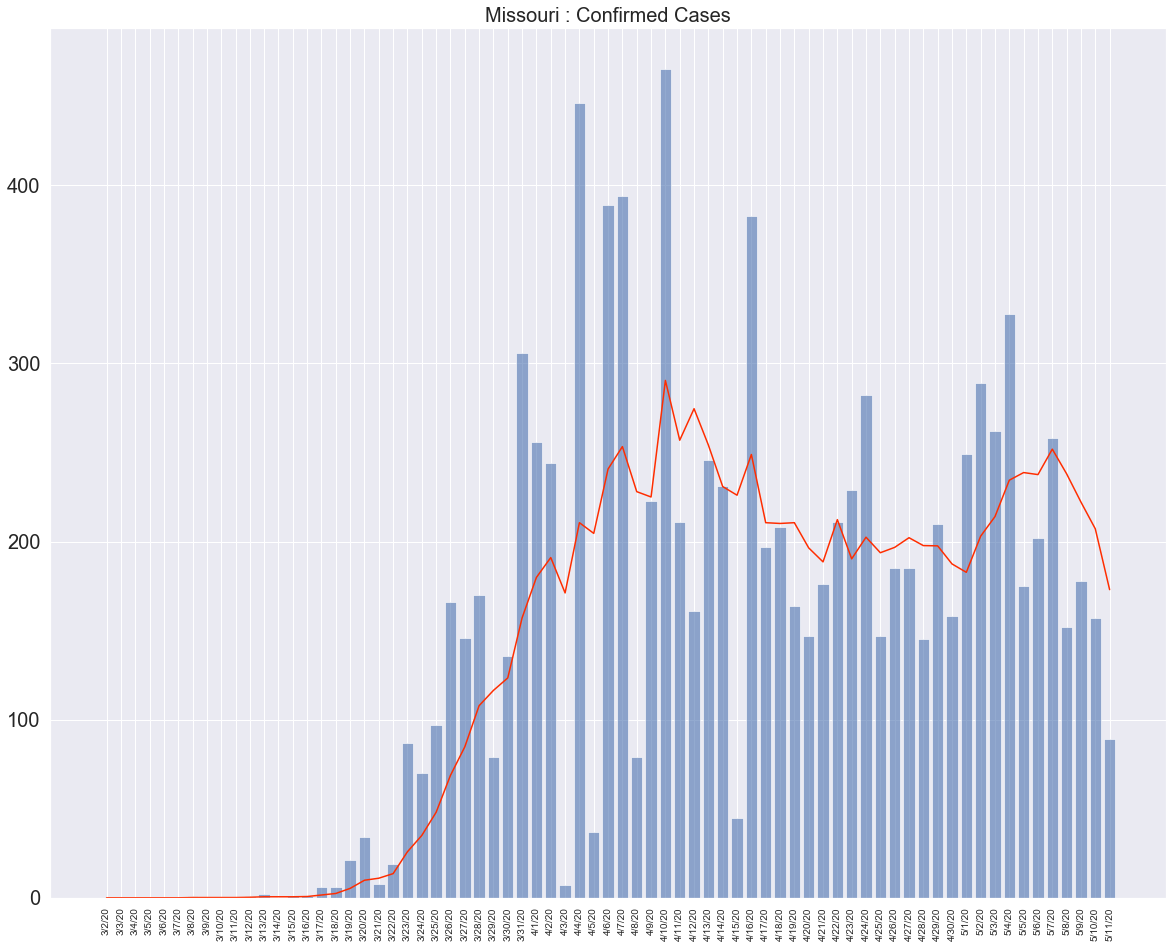

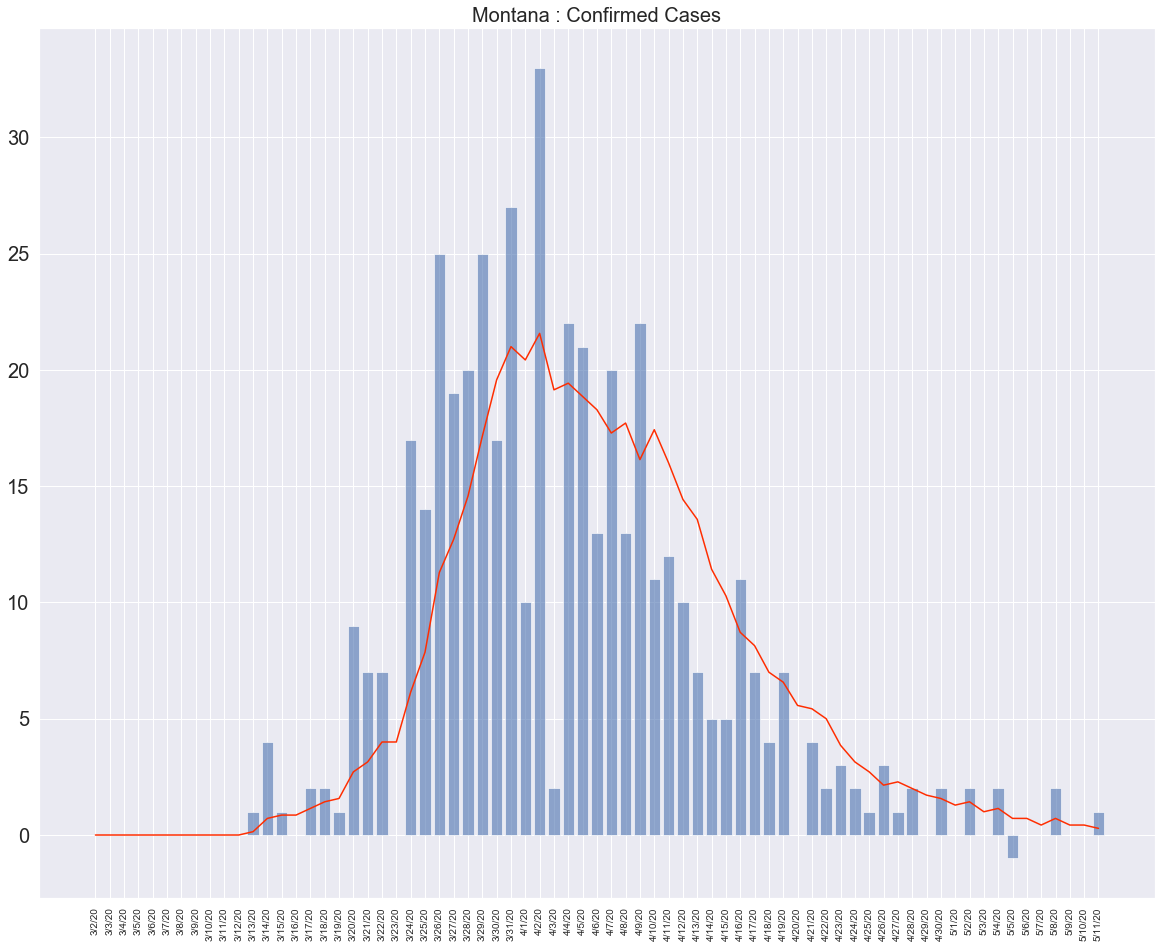

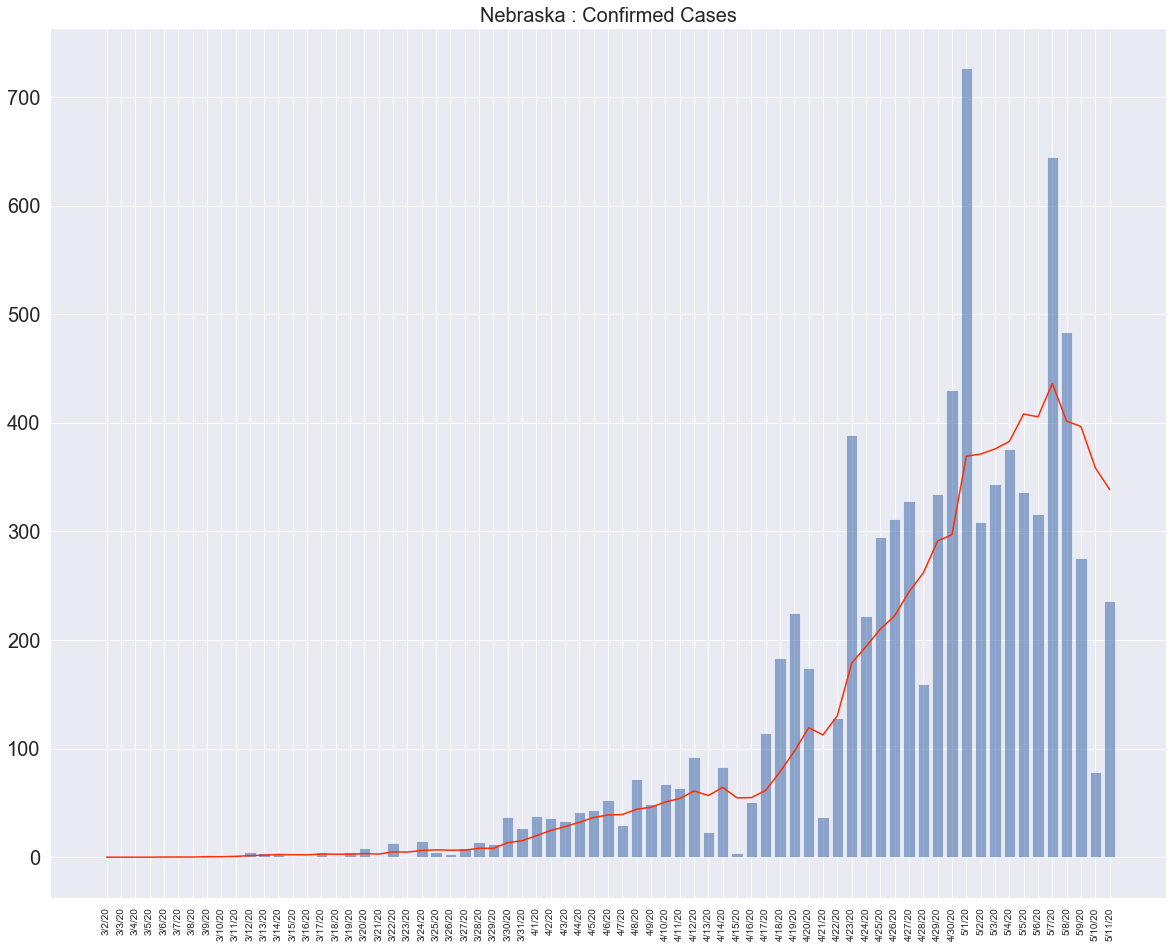

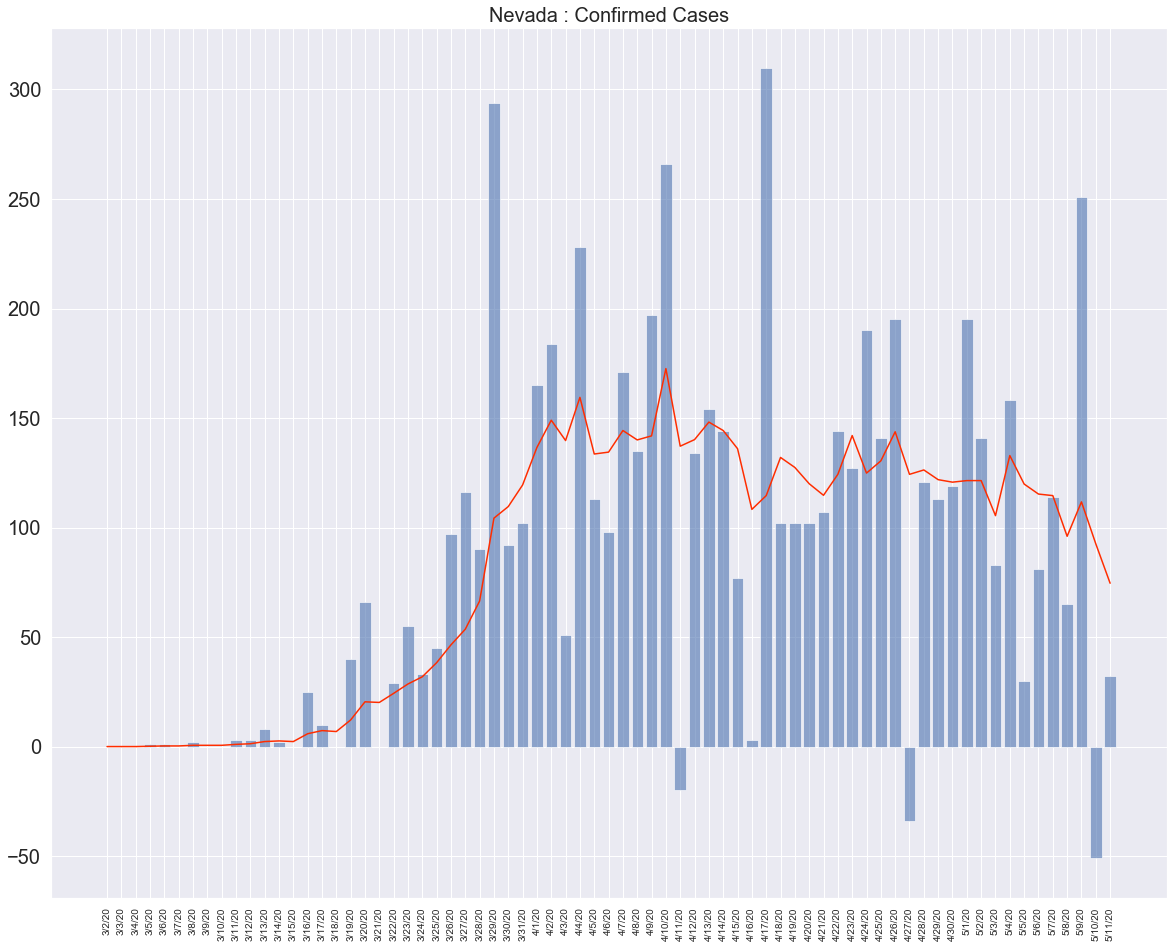

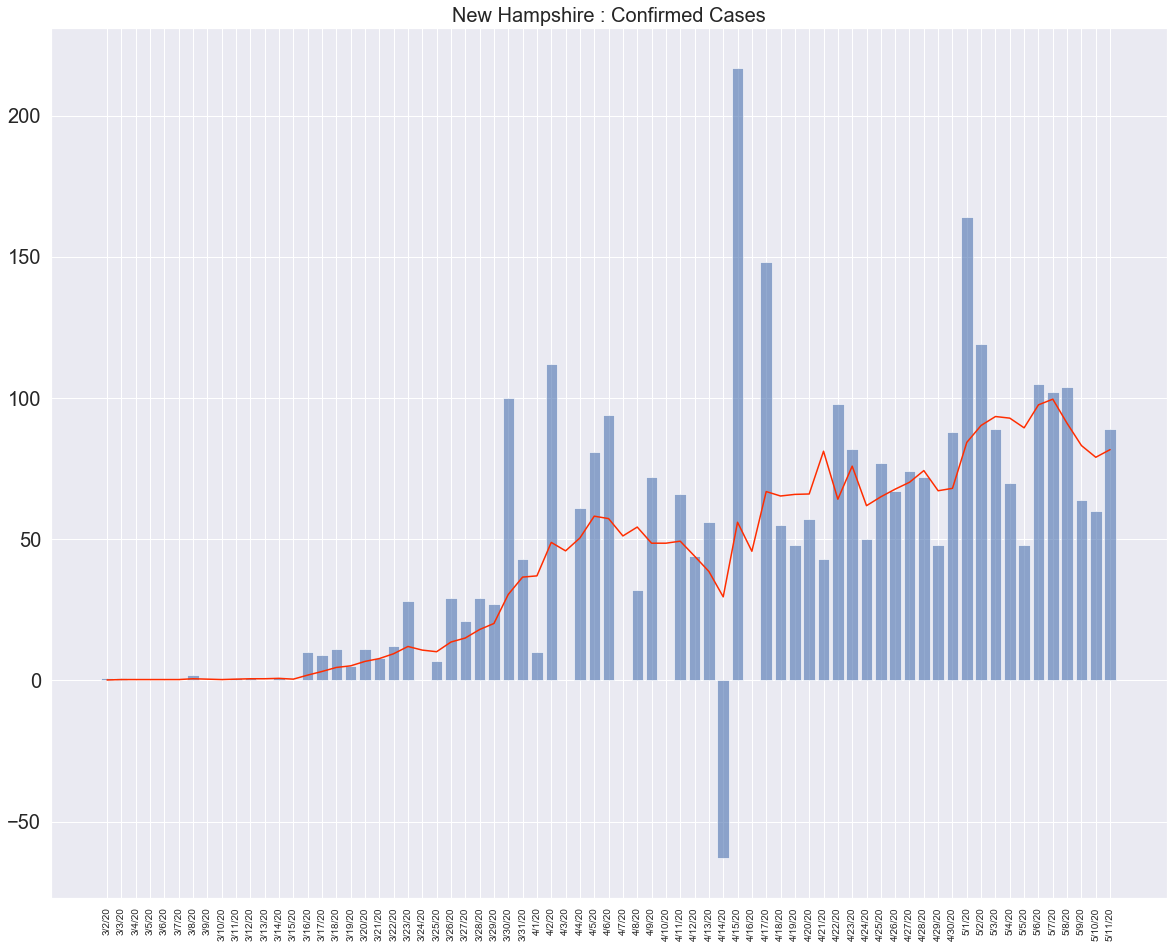

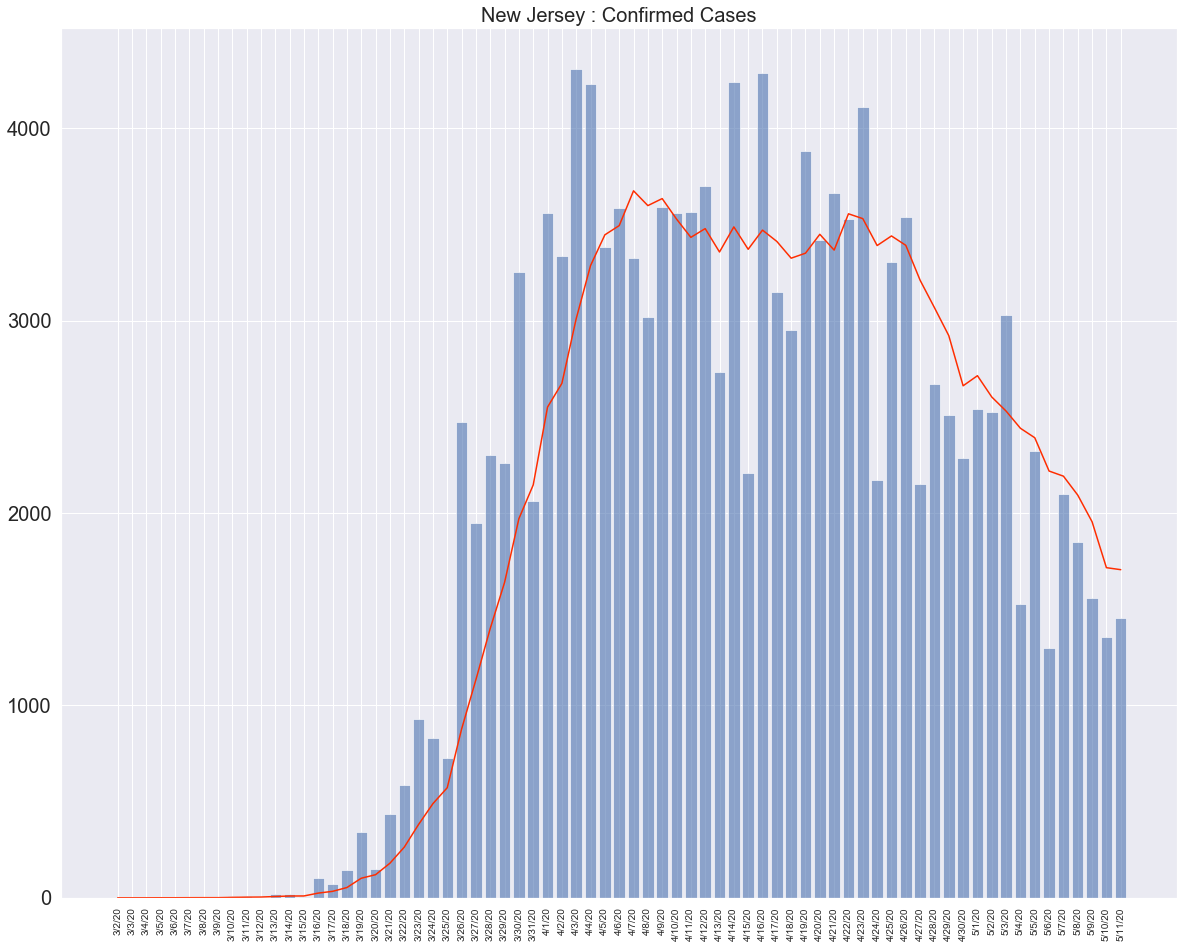

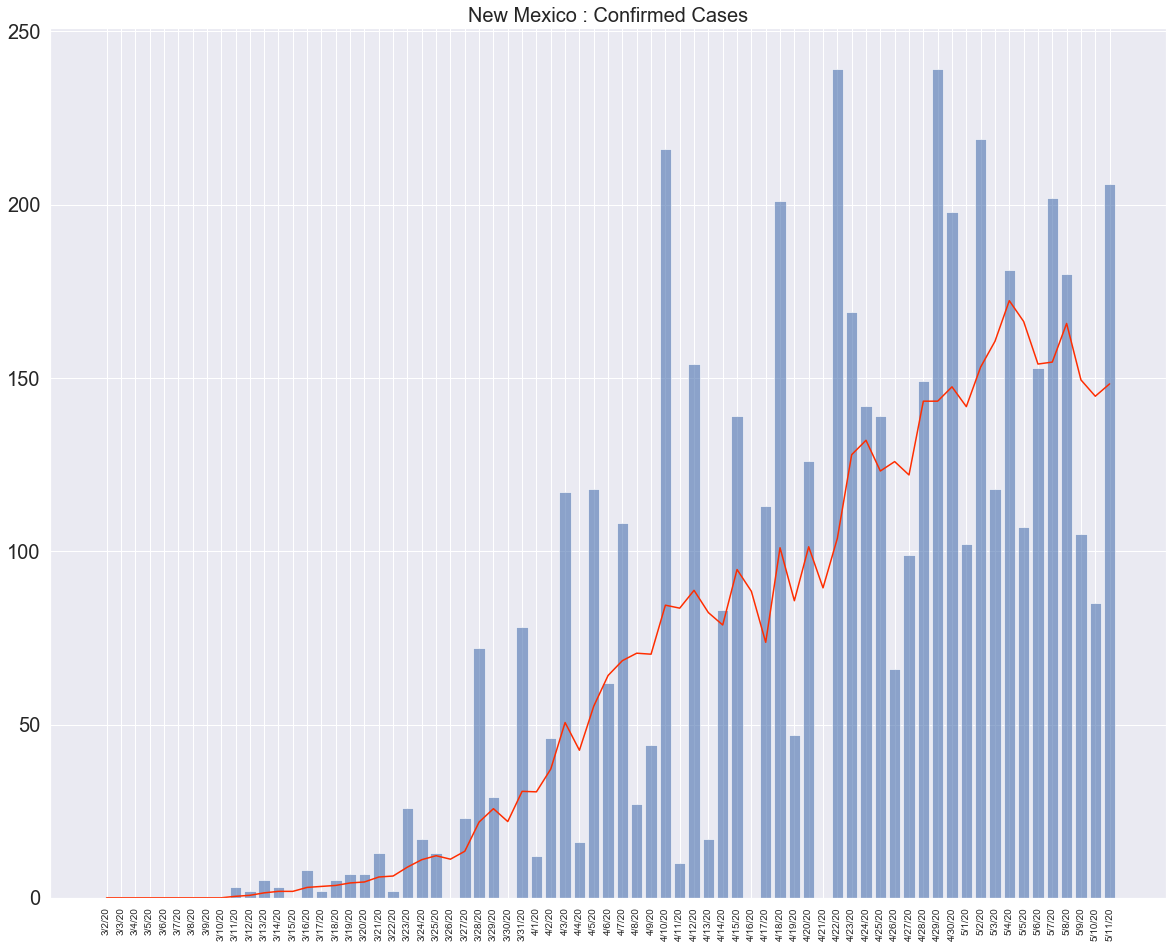

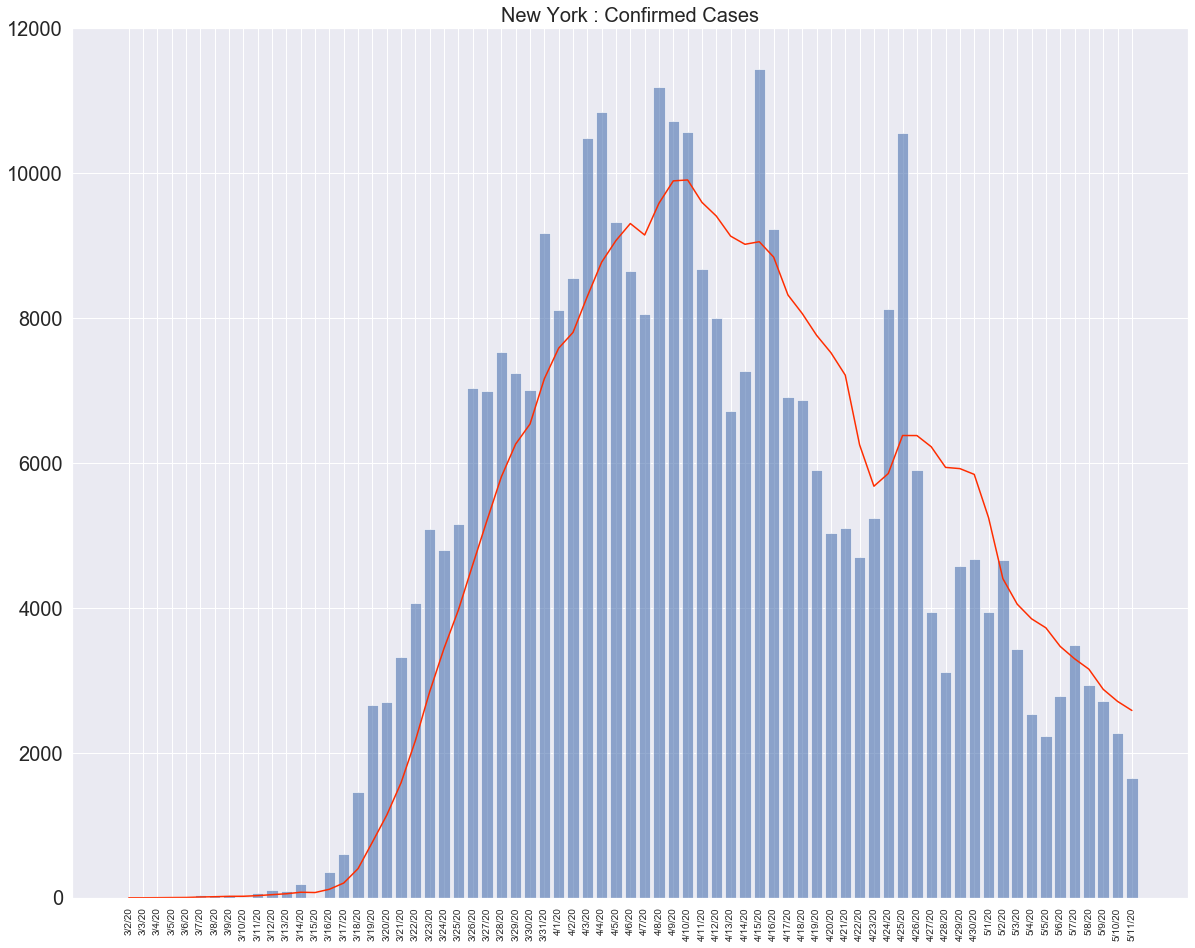

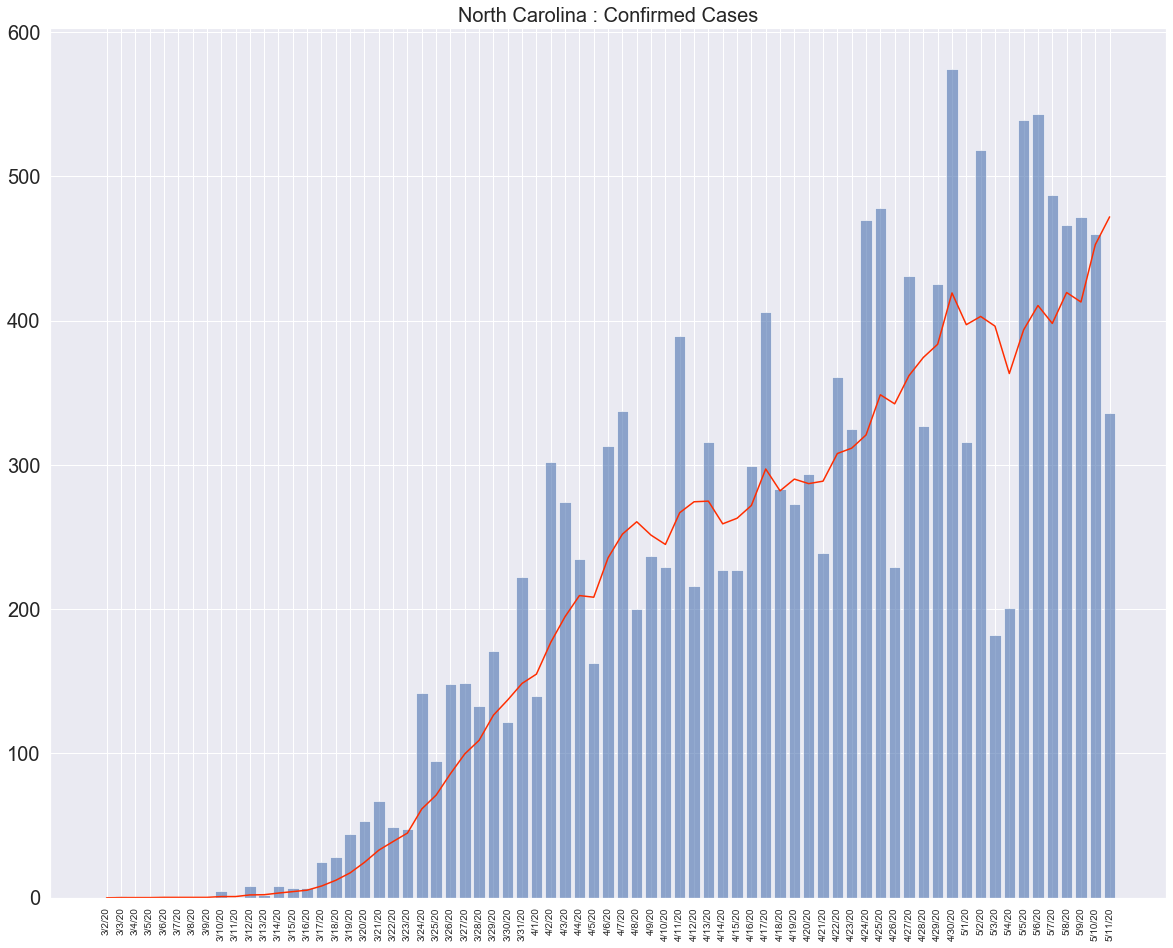

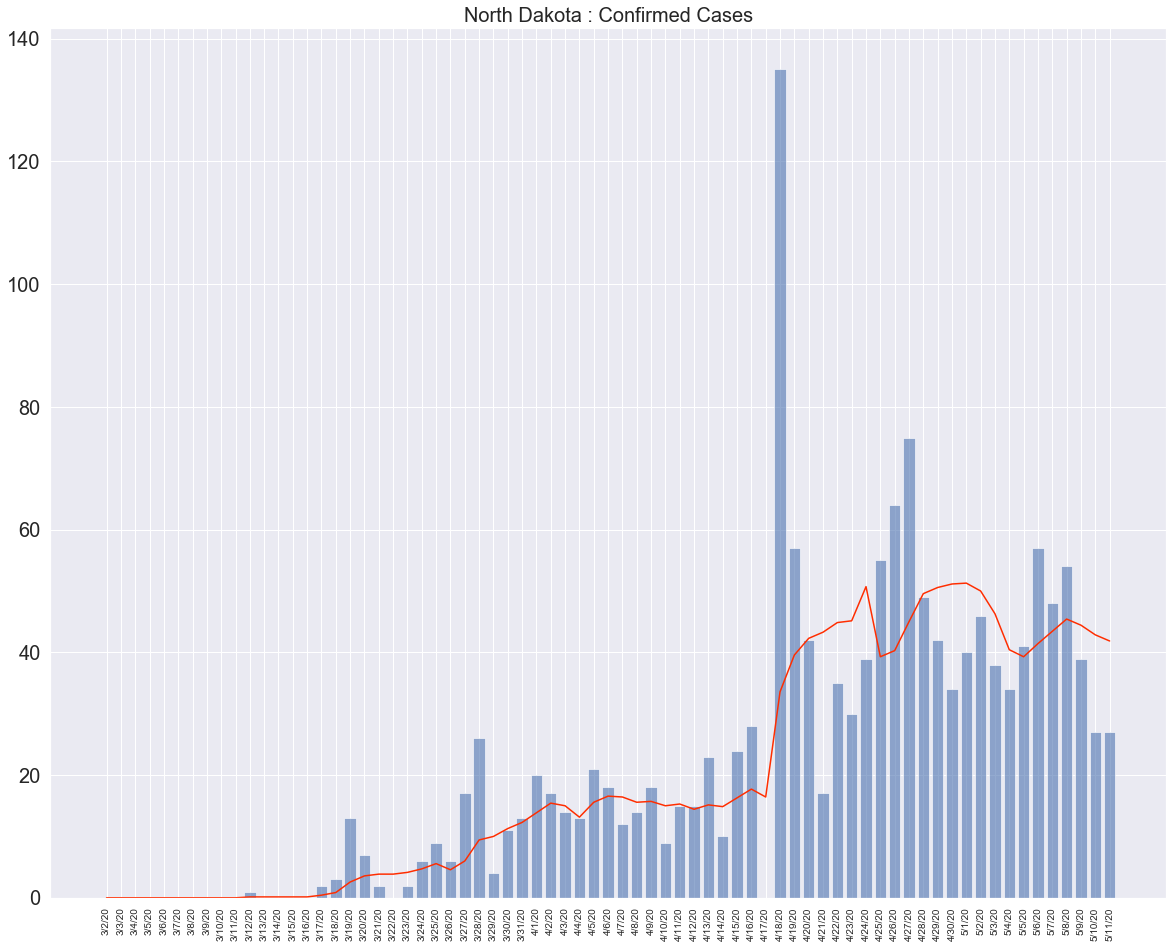

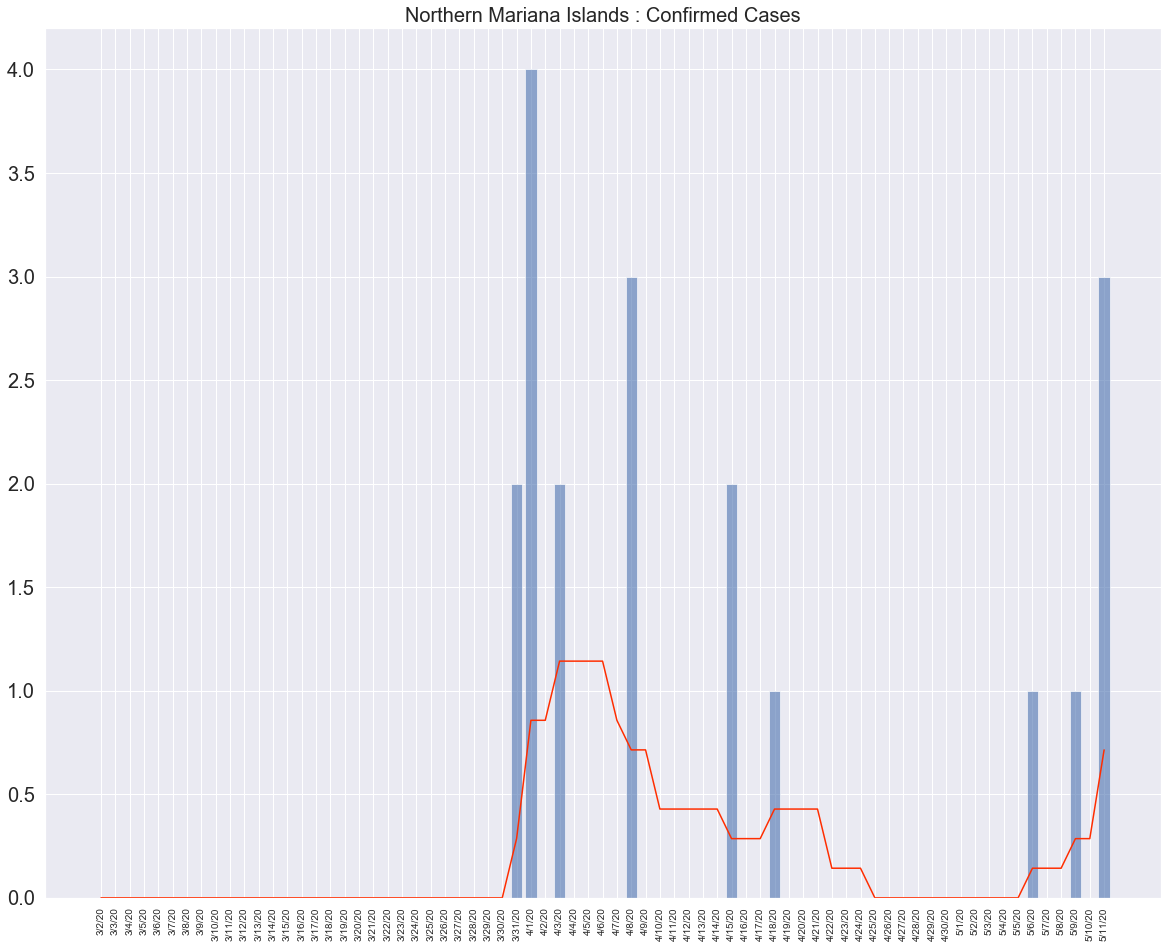

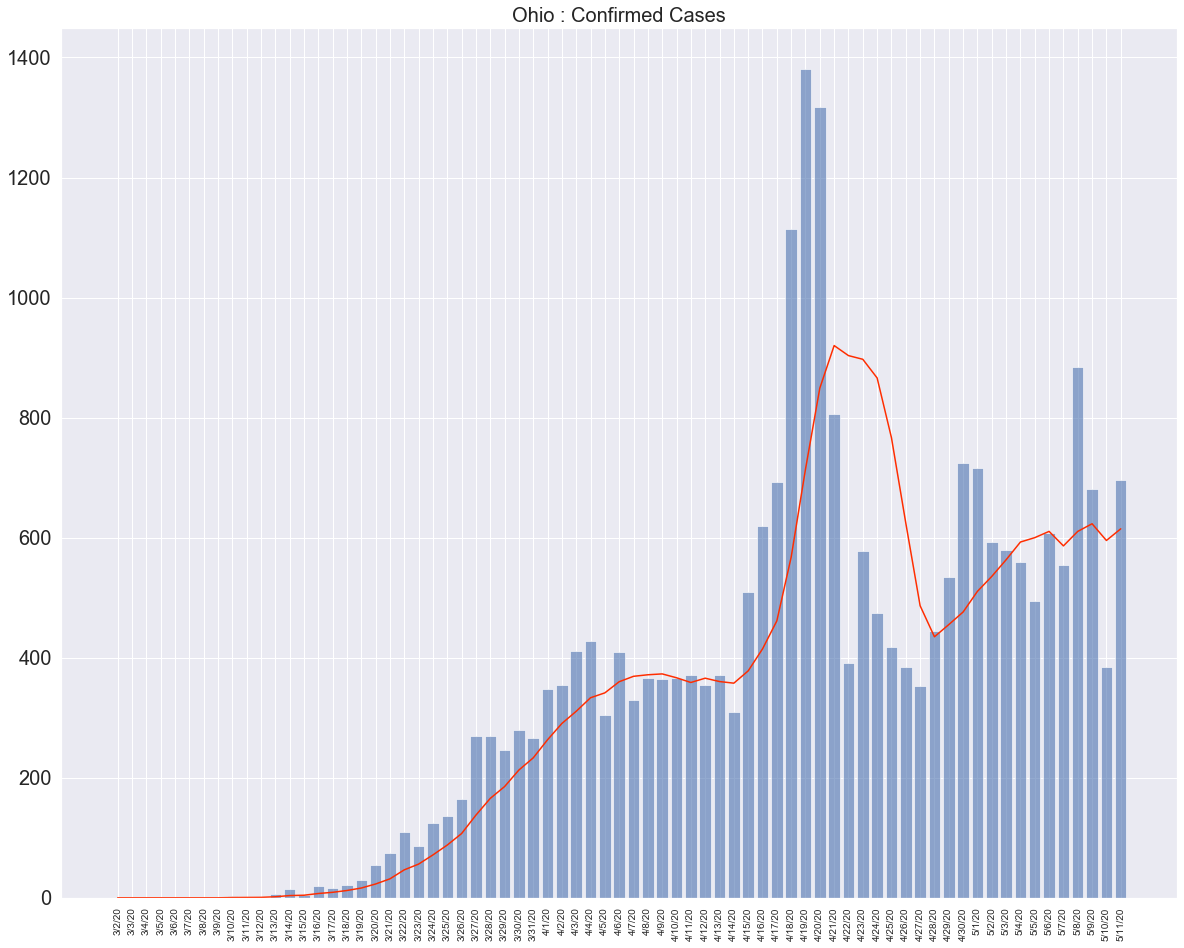

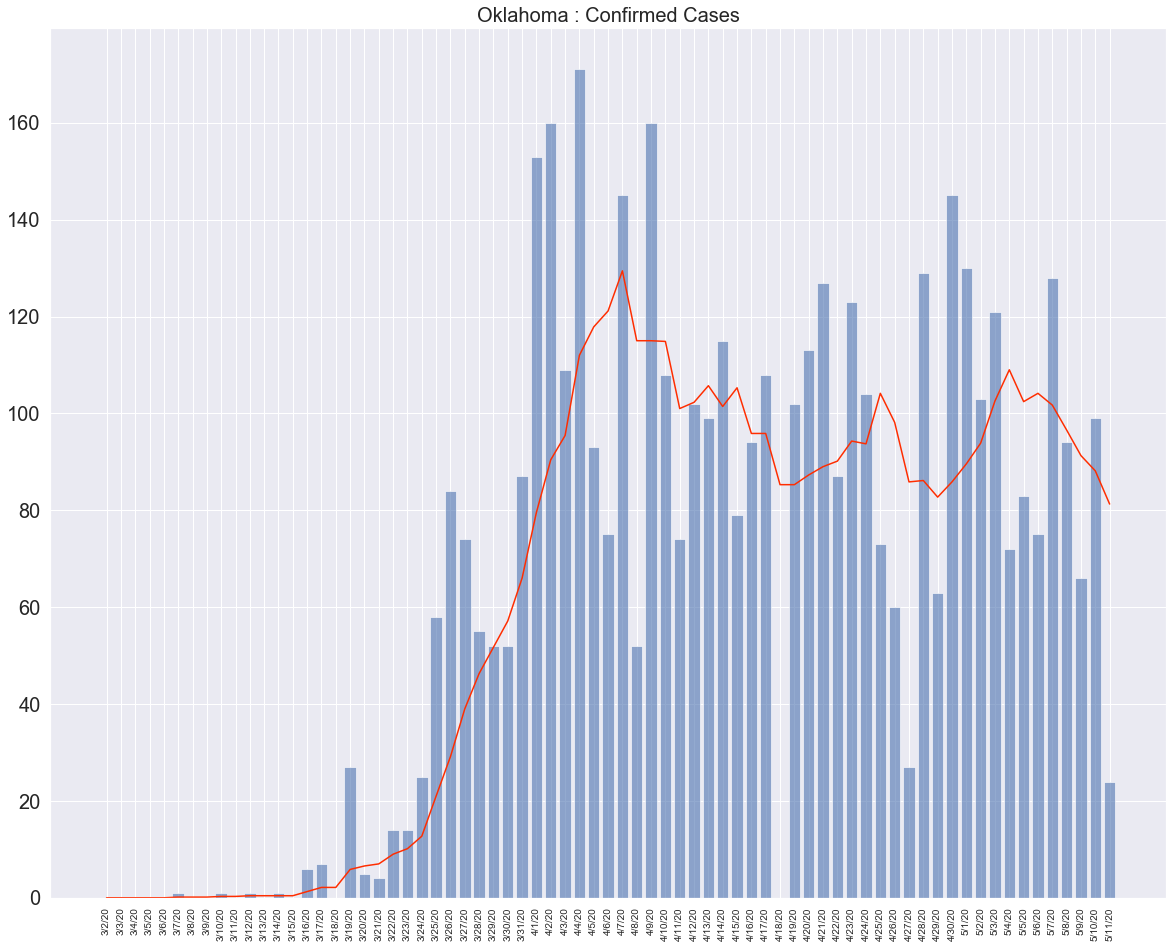

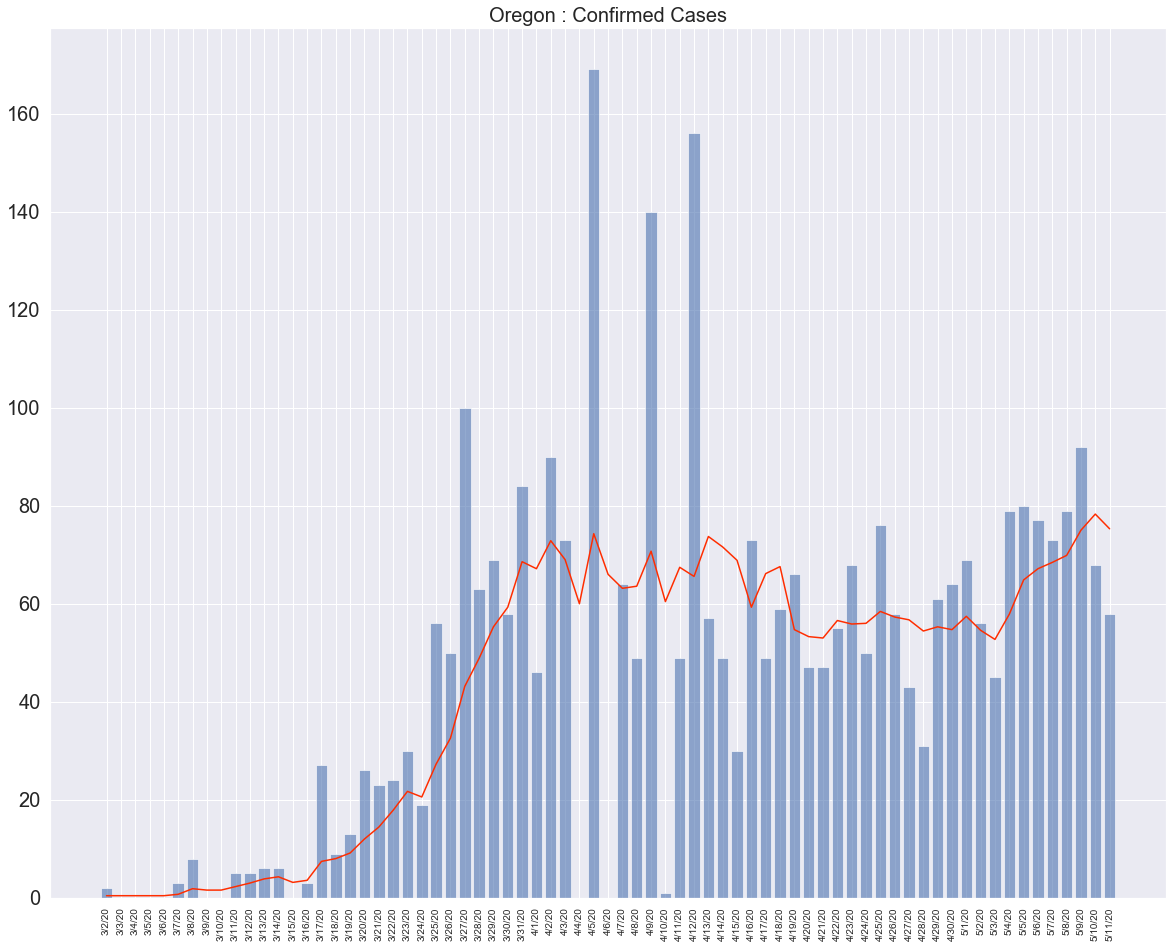

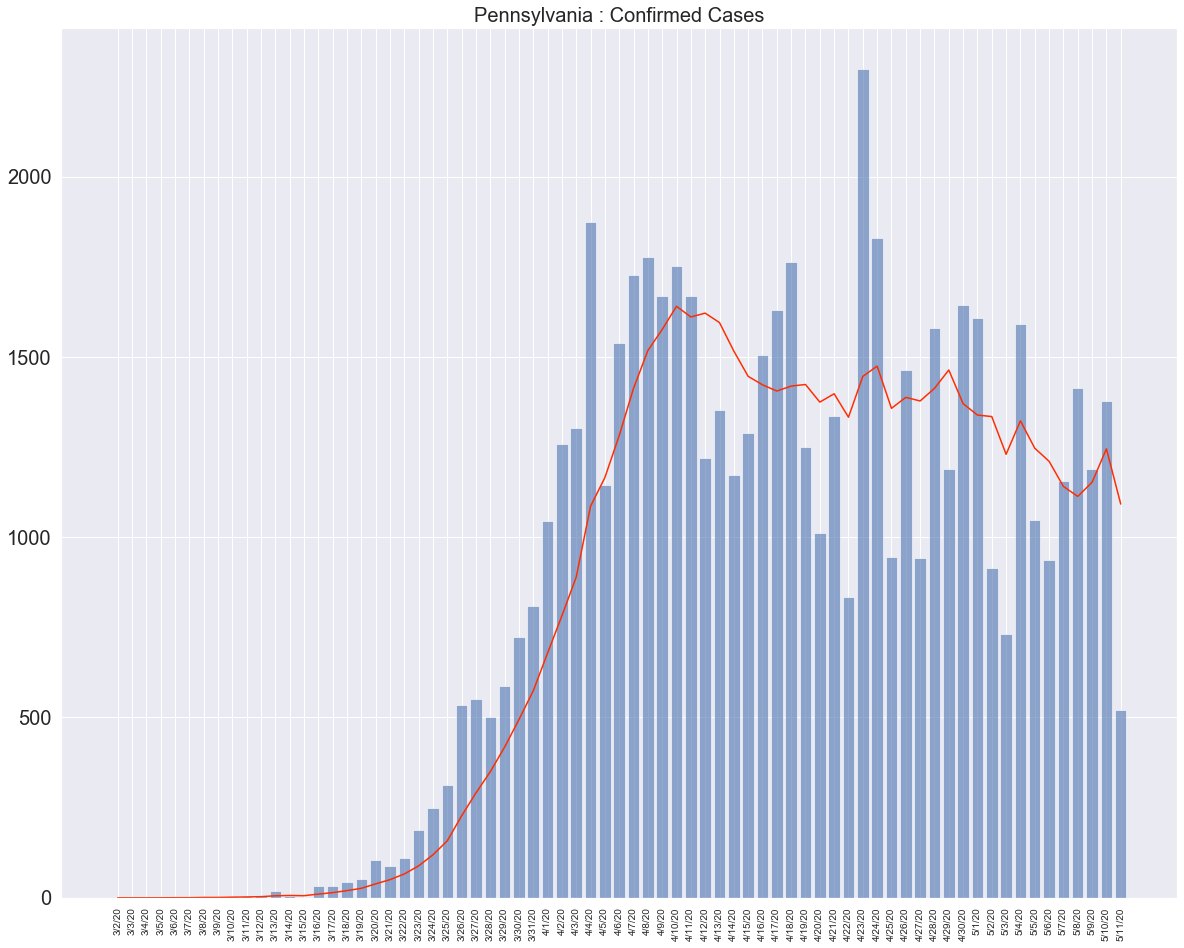

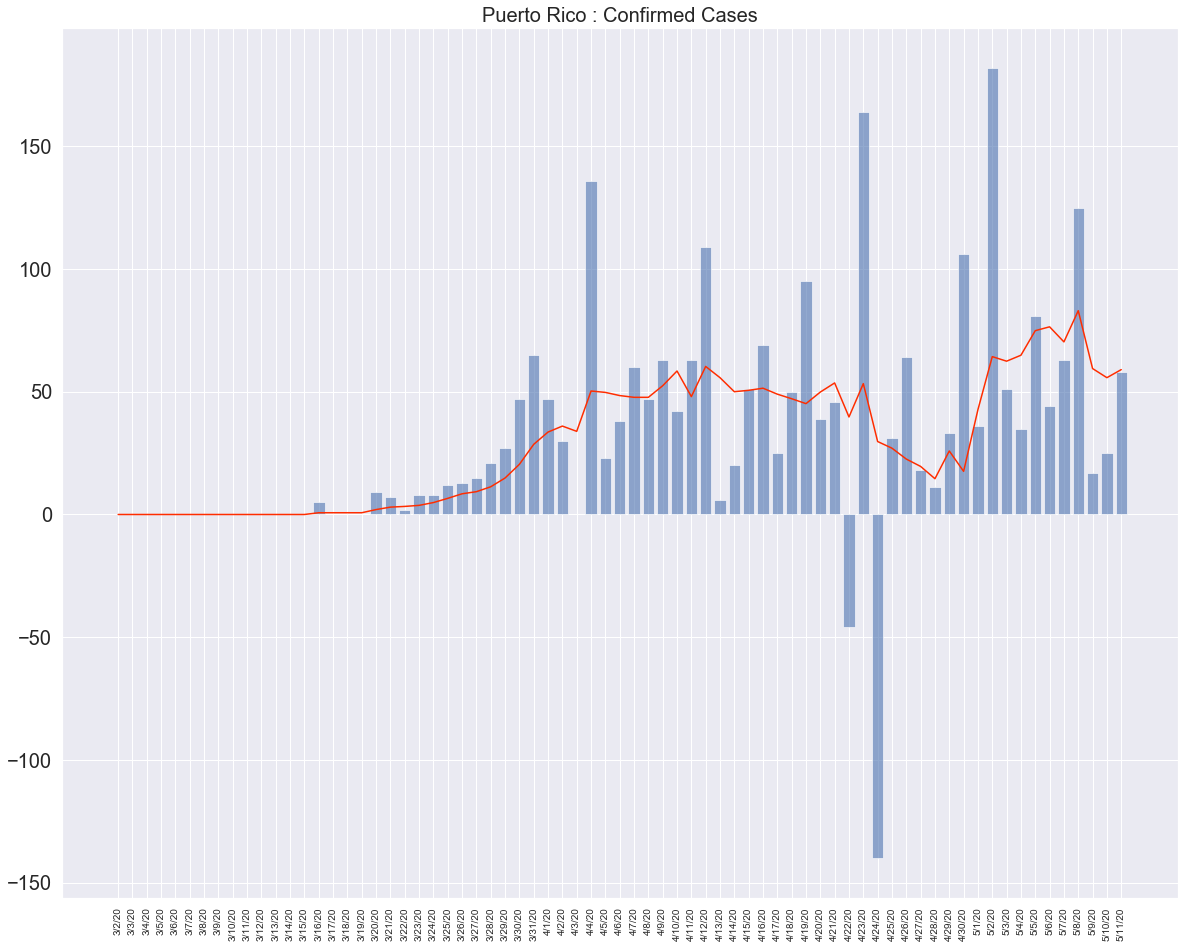

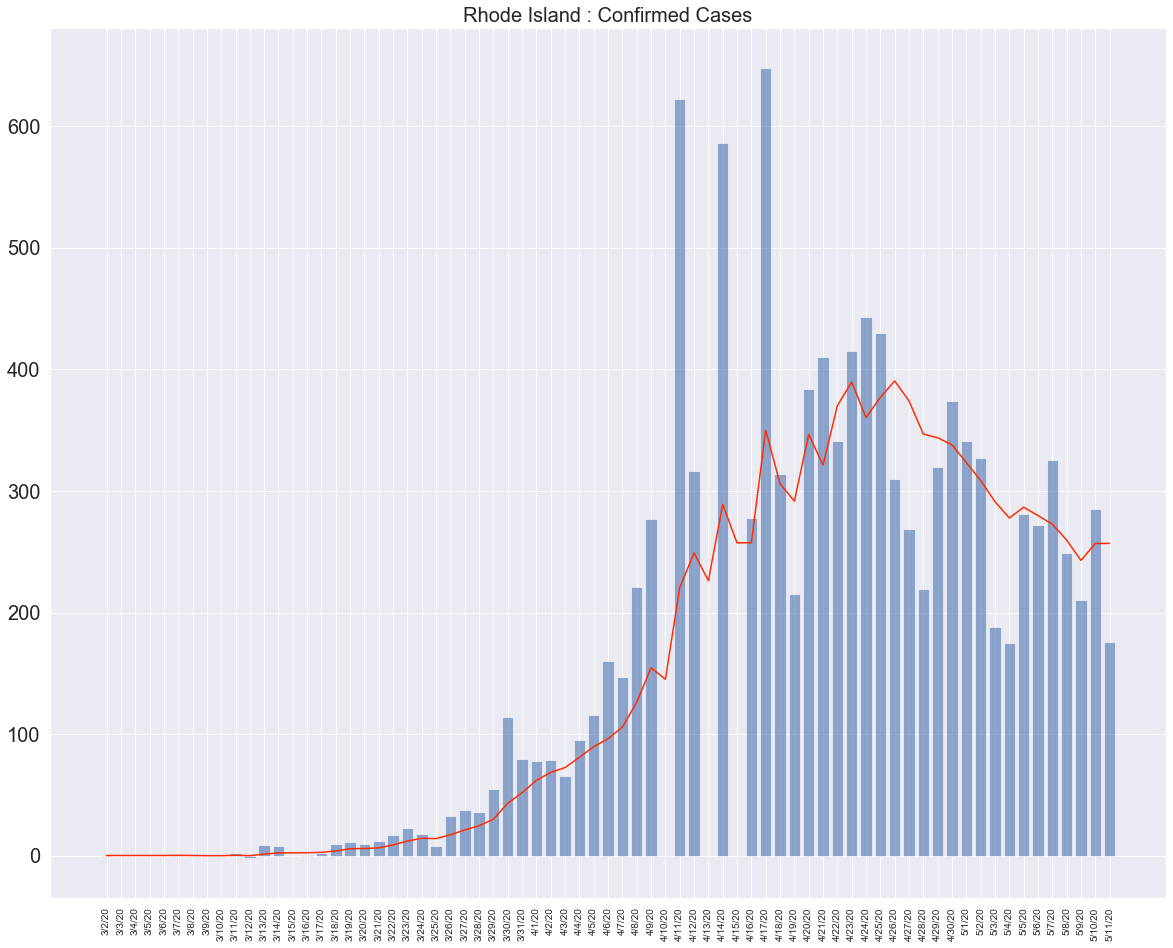

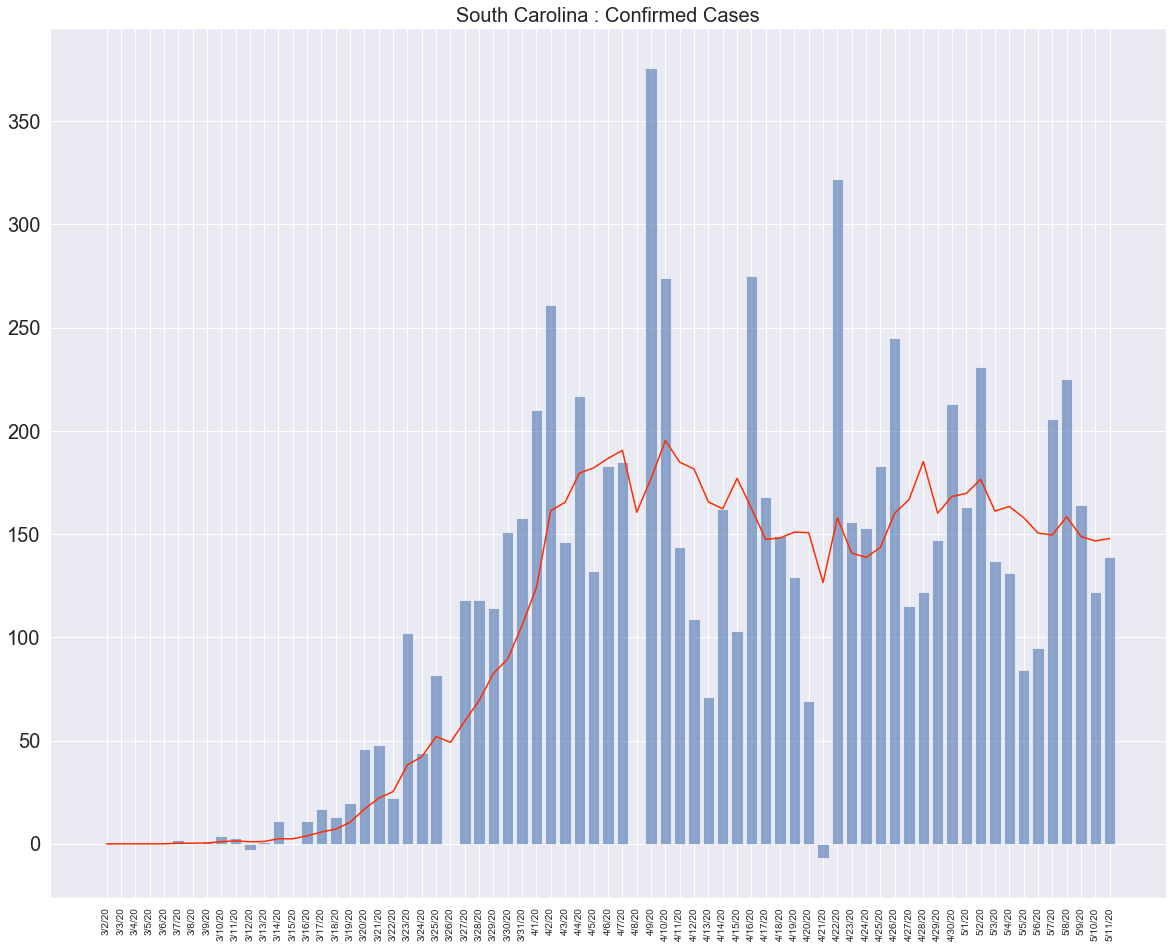

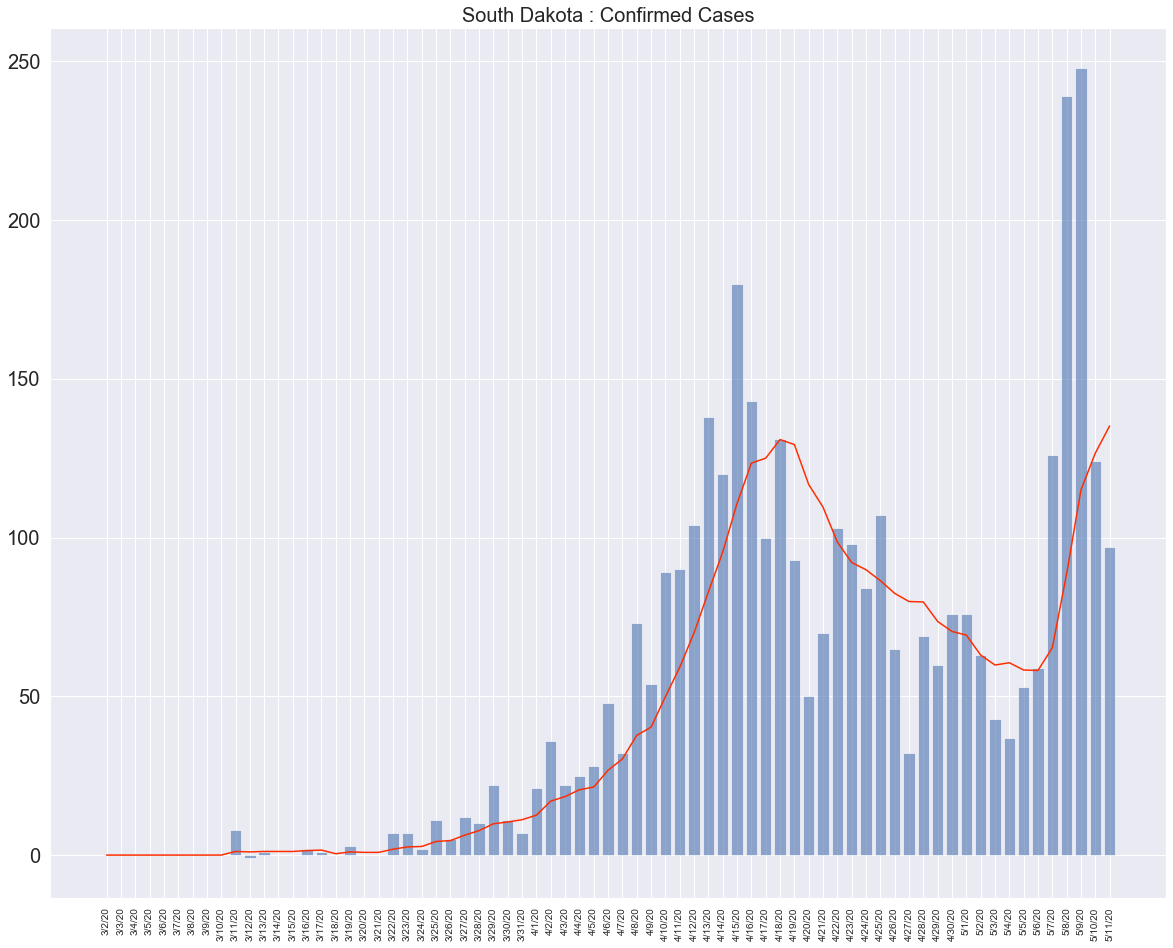

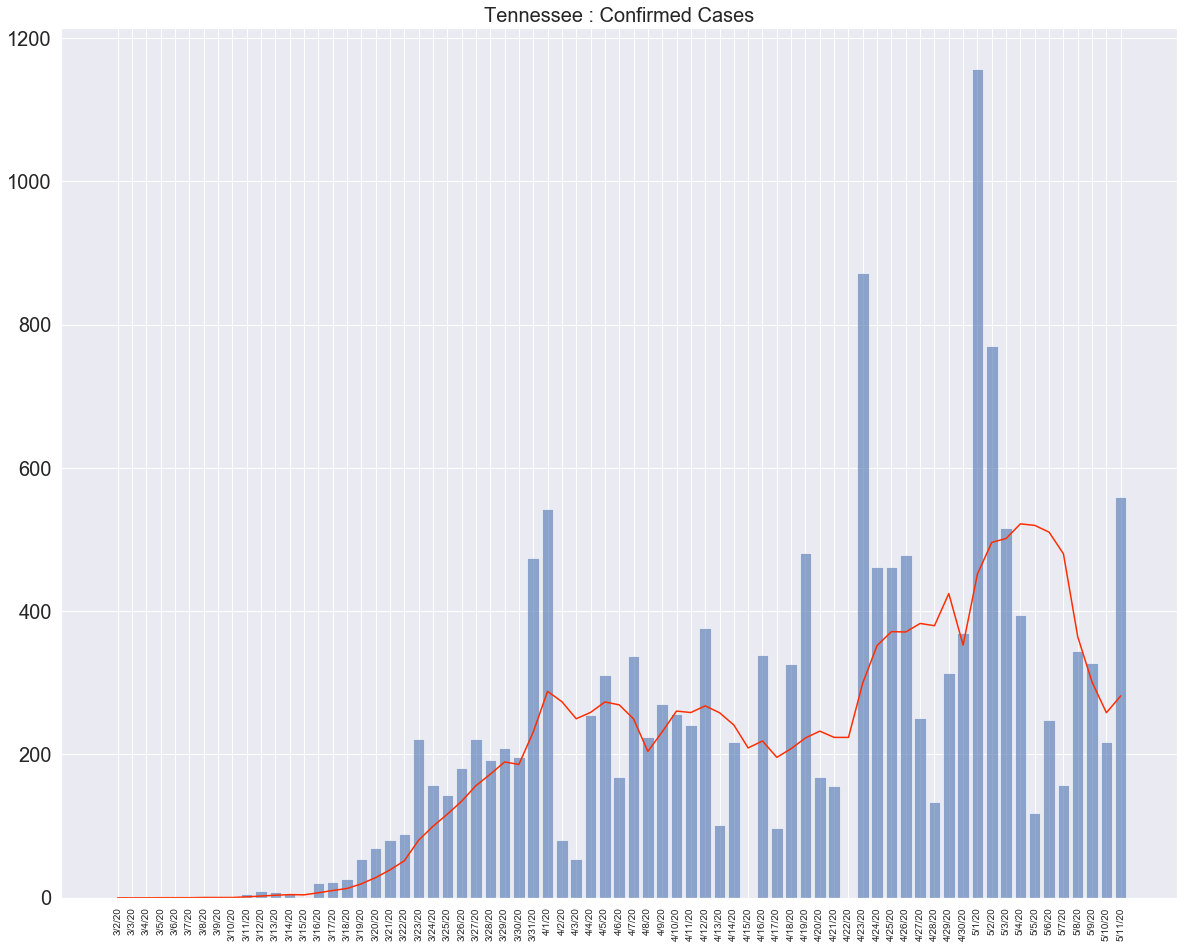

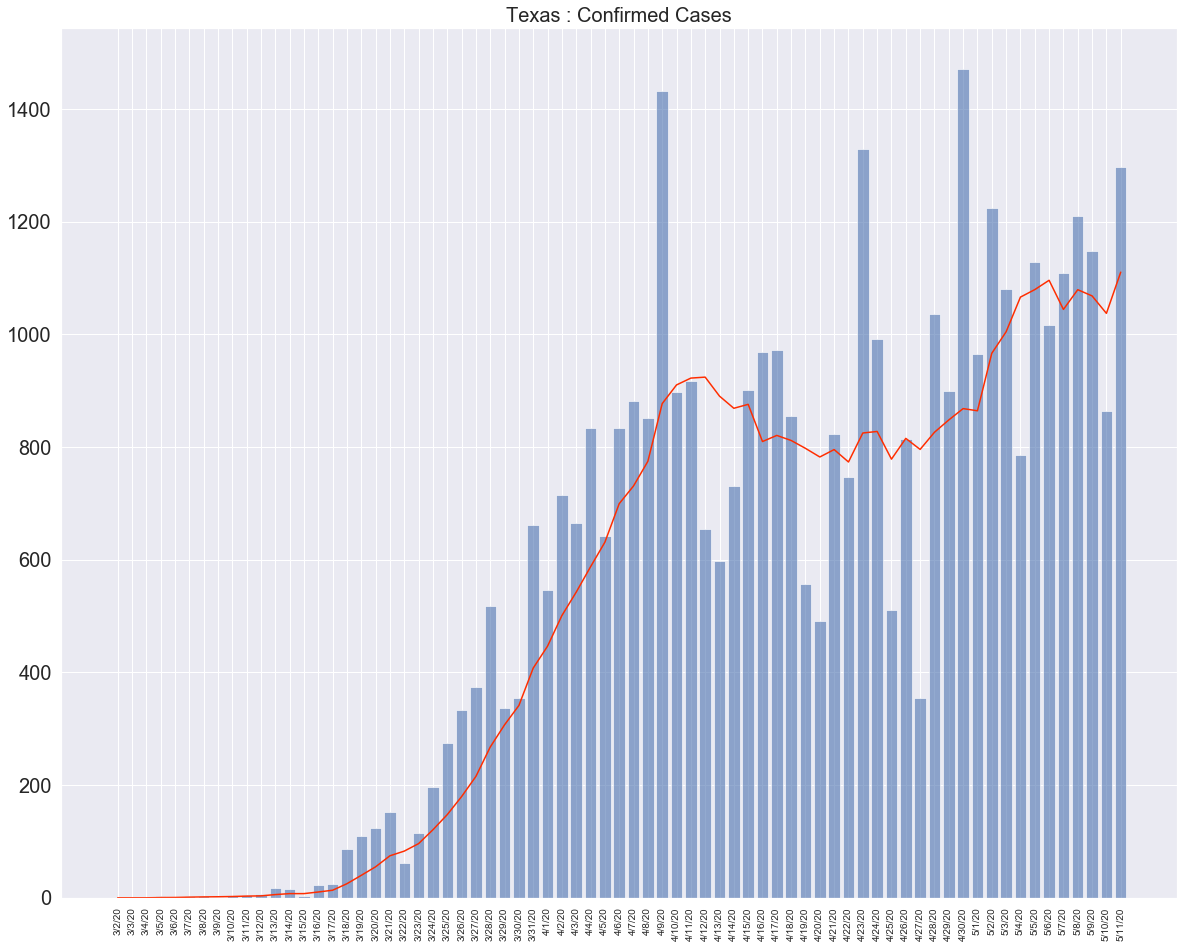

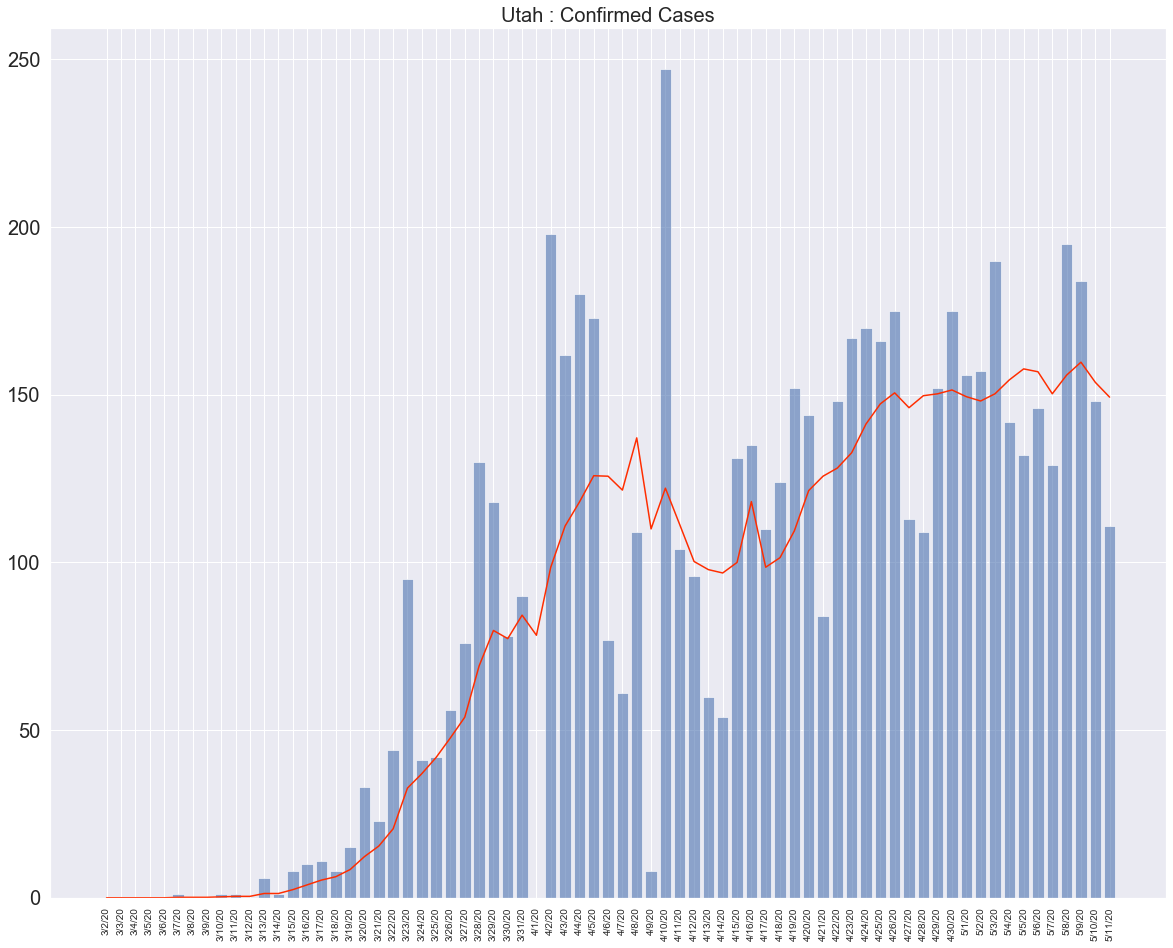

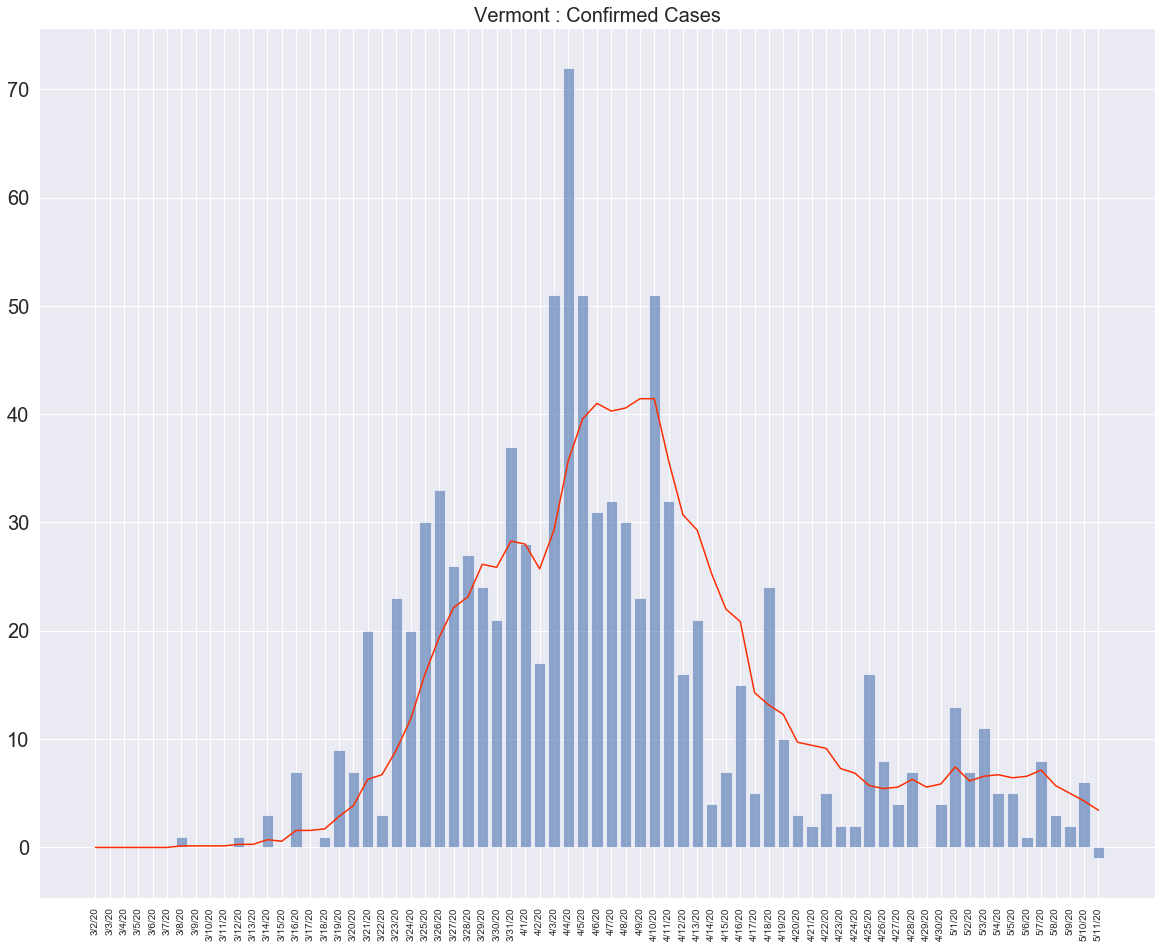

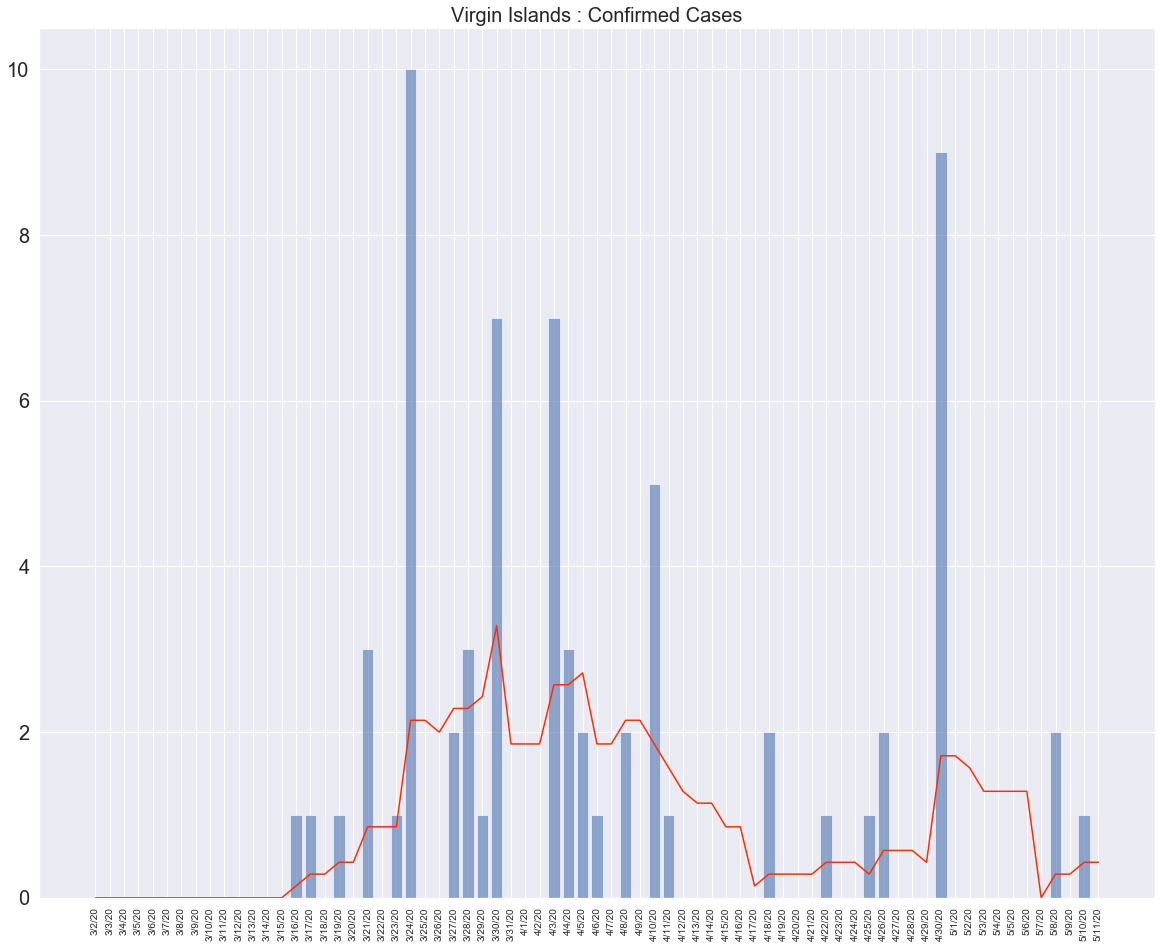

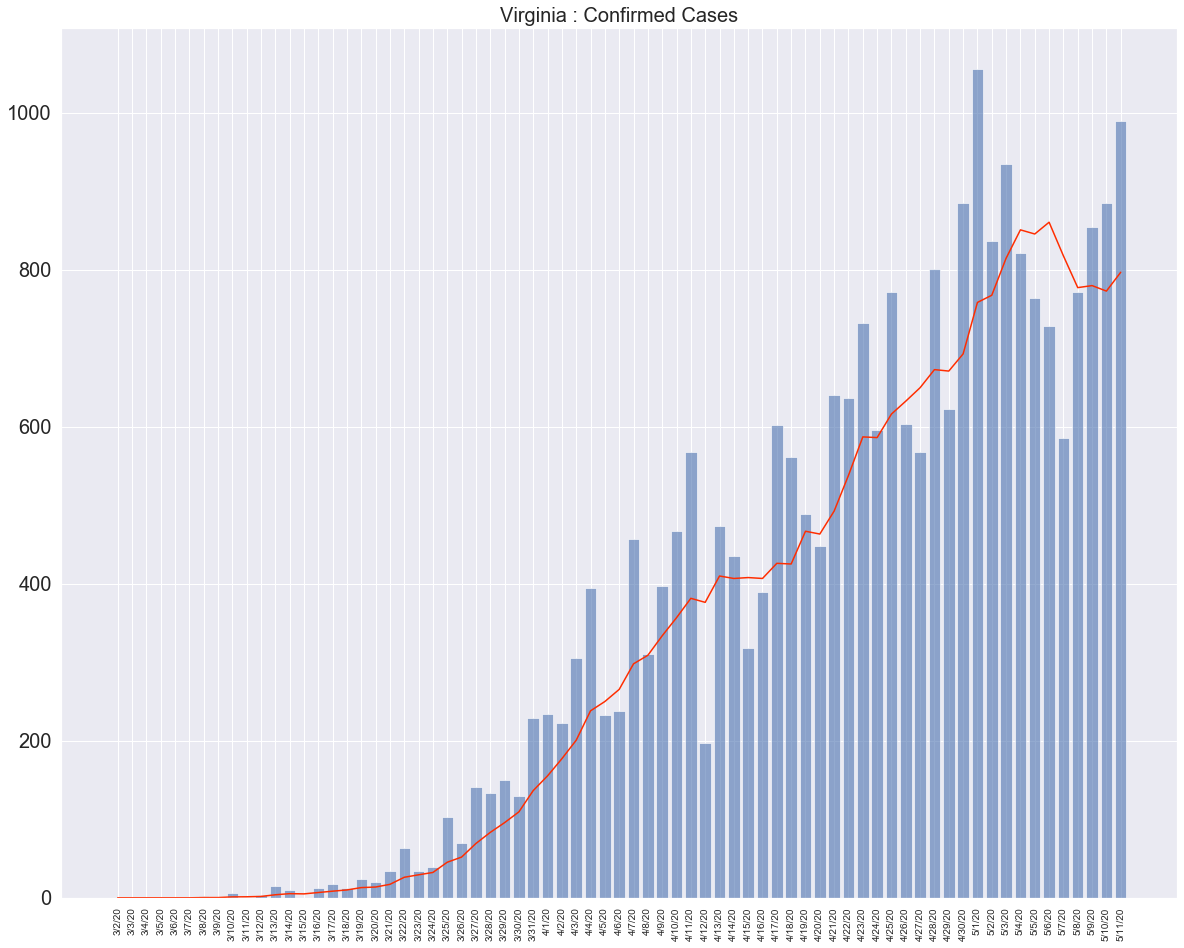

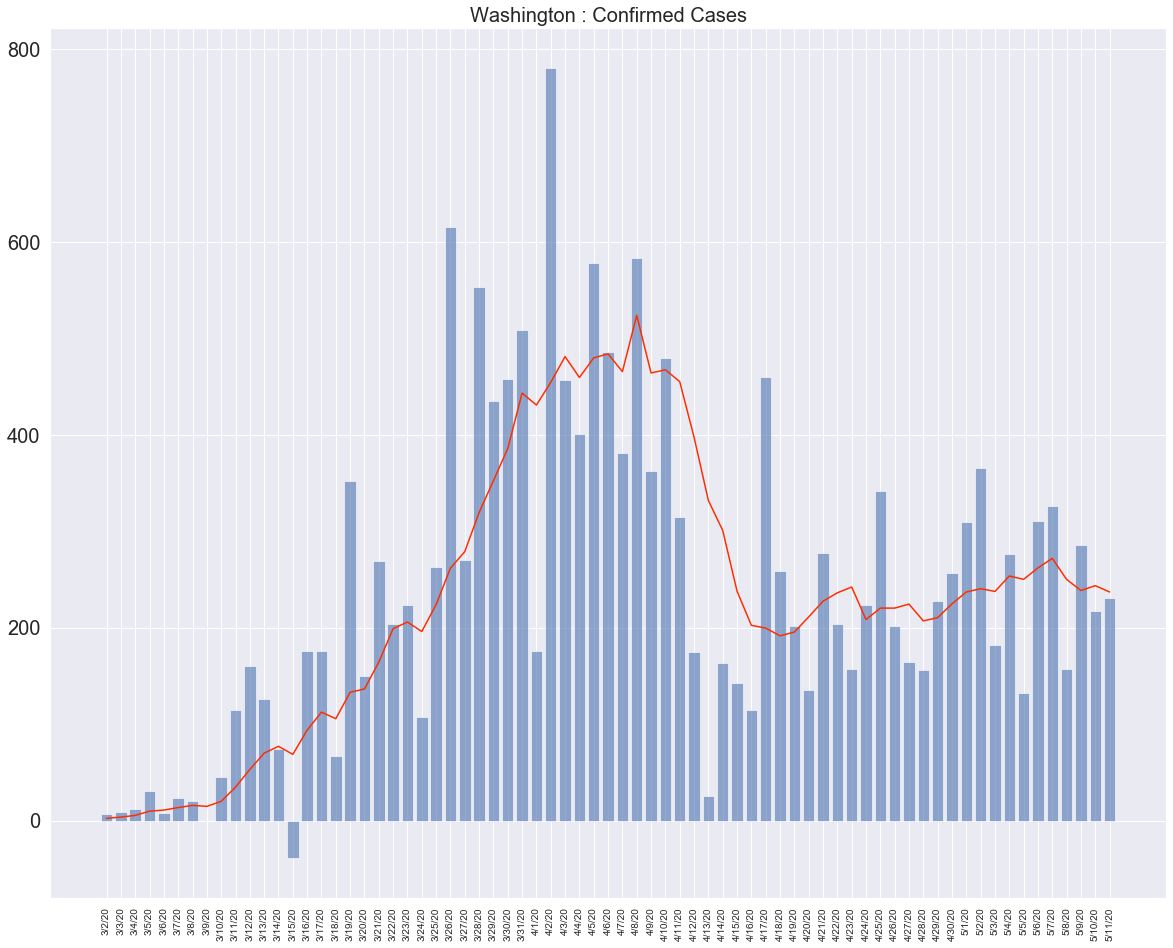

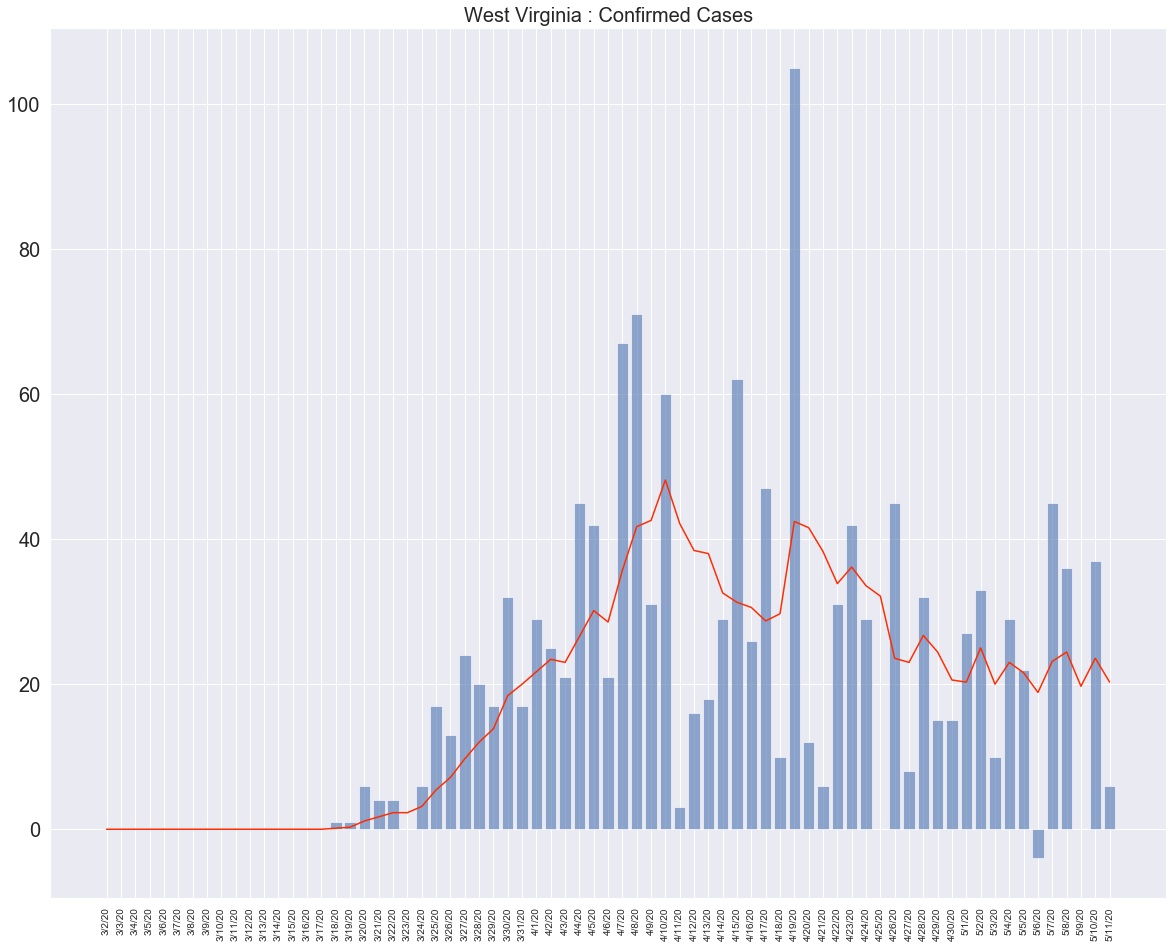

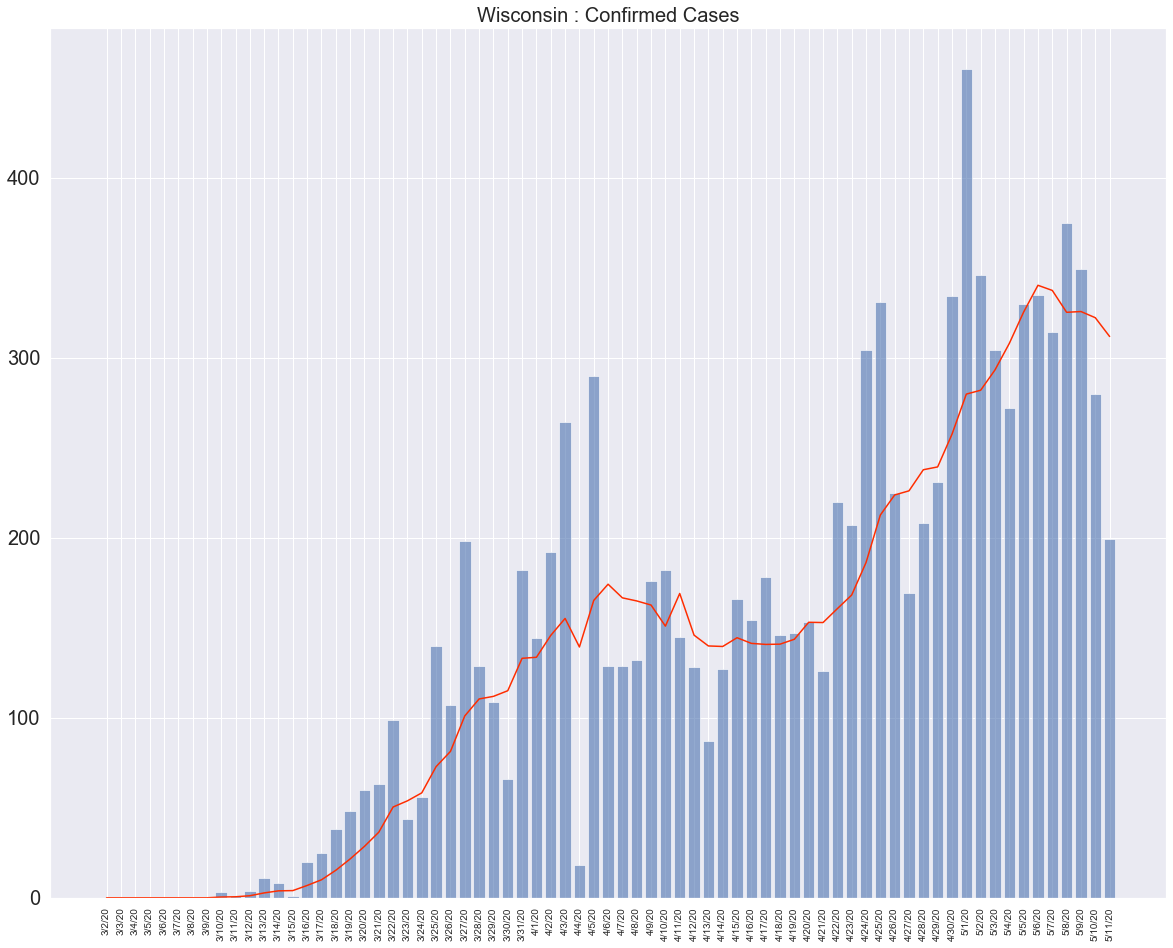

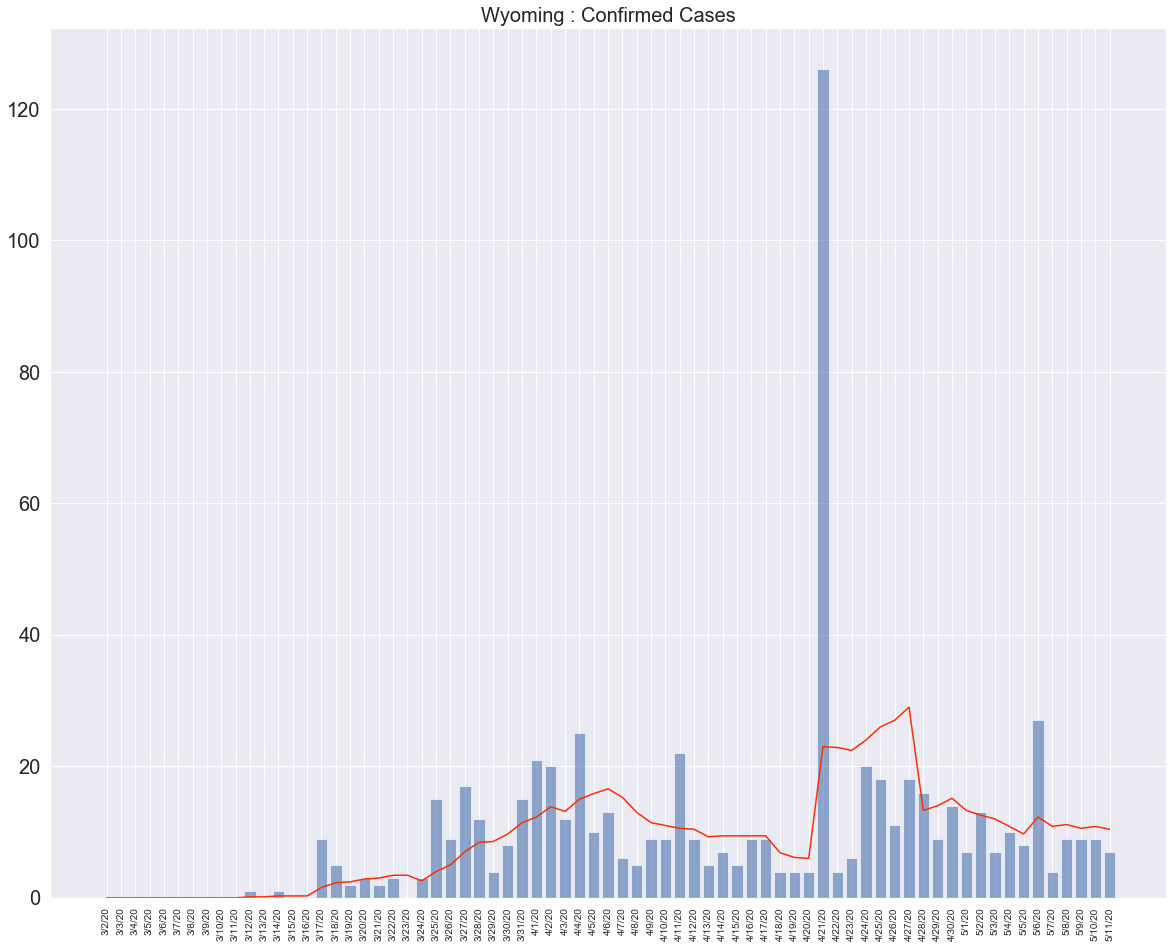

In [16]:
def counts_chart(counts, rolling_avg, dates, label):
    '''Plot distribution of new cases and the rolling average'''
    for index, row in counts.iterrows():
        
        # Isolate state
        state = row['Province_State']
        
        # Plot: Distribution of Counts of new cases per day
        plt.figure(figsize=(20,16))
        plt.bar(dates, row[dates], alpha=0.6)
        plt.title(state + ' : ' + label, fontsize=20)
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize=20)
        
        # Plot: Rolling Average
        plt.plot(dates, rolling_avg.loc[index, dates], c='#FF2D00', alpha=1.0)
        plt.show()
        
counts_chart(daily_counts_confirmed, rolling_avg_confirmed, dates[40:], 'Confirmed Cases')

In [105]:
# def count_curve(country):
#     sub_confirmed_df = confirmed_df[confirmed_df['Country/Region'] == country]
#     sub_deaths_df = deaths_df[deaths_df['Country/Region'] == country]
#     dates = country_df.columns[4:]
#     confirmed_count = np.ravel(sub_confirmed_df.iloc[:, 4:])
#     death_count = np.ravel(sub_deaths_df.iloc[:, 4:])

#     plt.figure(figsize=(20,16))
#     plt.plot(dates, confirmed_count, label=country)
#     plt.plot(dates, death_count, label=country)
#     plt.xticks(rotation=90, fontsize=12)
#     plt.yticks(fontsize=20)


In [106]:
# count_curve('Japan')